In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("deep")
plt.rc('font', family='NanumGothic')

# scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score

# 데이터 불러오기

In [ ]:
# 데이터 불러오기
final = pd.read_csv('cluster_data_new.csv', thousands=',')
final = final.rename(columns={'면적(㎢)':'면적'})
final.head()

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
0,고운동,34517,184624.92000,68,9,2,5.35,389
1,금남면,8974,64802.10870,174,0,8,72.50,588
2,다정동,28493,64773.30854,27,1,6,1.70,5
3,대평동,11320,72259.09128,24,1,0,1.52,192
4,도담동,41059,155268.77490,51,17,48,4.72,951


## 산점도

## 변수별 이상치 확인

In [ ]:
final.describe()

,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,18265.450000,92206.440758,110.150000,3.600000,12.100000,23.012450,549.650000
std,14146.236801,67472.479045,115.495853,4.615762,18.789415,24.522955,608.116529
min,2355.000000,21112.929760,18.000000,0.000000,0.000000,1.150000,5.000000
25%,6079.500000,46973.124092,39.500000,0.000000,2.000000,2.572500,189.500000
50%,15140.000000,64787.708620,64.000000,1.500000,6.000000,13.140000,442.000000
75%,30639.000000,111346.033100,157.000000,6.000000,9.250000,43.382500,533.250000
max,43348.000000,281108.759700,498.000000,17.000000,73.000000,72.500000,2859.000000


In [ ]:
def get_outliers(df, col, weight):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    IQR_weight = IQR*weight
    
    lowest = Q1 - IQR_weight
    highest = Q3 + IQR_weight
    
    outlier = df[(df[col] < lowest) | (df[col] > highest)]
    return outlier

In [ ]:
get_outliers(final, '총인구', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수


In [ ]:
get_outliers(final, '평균공시지가', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수


In [ ]:
get_outliers(final, '상권수', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
17,조치원읍,43348,281108.7597,498,9,73,13.56,2859


In [ ]:
get_outliers(final, '면적', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수


In [ ]:
get_outliers(final, '버스정류장수', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수


In [ ]:
get_outliers(final, '어울링대여소', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수


In [ ]:
get_outliers(final, '주차장', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
4,도담동,41059,155268.7749,51,17,48,4.720,951
7,새롬동,33966,104717.5482,49,2,37,3.099,1073
17,조치원읍,43348,281108.7597,498,9,73,13.560,2859


In [ ]:
# 이상치는 하한값, 상한값으로 대체함
# 이상치가 추출되는 상권수, 주차장 모두 상한값으로 판단되므로 상한값으로 바꿈
# = 원저화, 원저라이징

In [ ]:
Q1 = np.percentile(final['상권수'], 25)
Q3 = np.percentile(final['상권수'], 75)
IQR = Q3 - Q1
IQR_weight = IQR*3

highest_market = Q3 + IQR_weight
highest_market

1564.5

In [ ]:
df = final.copy()
df.head()

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
0,고운동,34517,184624.92000,68,9,2,5.35,389
1,금남면,8974,64802.10870,174,0,8,72.50,588
2,다정동,28493,64773.30854,27,1,6,1.70,5
3,대평동,11320,72259.09128,24,1,0,1.52,192
4,도담동,41059,155268.77490,51,17,48,4.72,951


In [ ]:
get_outliers(final, '상권수', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
17,조치원읍,43348,281108.7597,498,9,73,13.56,2859


In [ ]:
df.loc[df['행정동']=='조치원읍', '상권수'] = highest_market
df[df['행정동']=='조치원읍']

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
17,조치원읍,43348,281108.7597,498,9,73,13.56,1564.5


In [ ]:
Q1 = np.percentile(final['주차장'], 25)
Q3 = np.percentile(final['주차장'], 75)
IQR = Q3 - Q1
IQR_weight = IQR*3

highest_parking = Q3 + IQR_weight
highest_parking

31.0

In [ ]:
get_outliers(final, '주차장', 3)

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
4,도담동,41059,155268.7749,51,17,48,4.720,951
7,새롬동,33966,104717.5482,49,2,37,3.099,1073
17,조치원읍,43348,281108.7597,498,9,73,13.560,2859


In [ ]:
df.loc[(df['행정동']=='도담동') | (df['행정동']=='새롬동') | (df['행정동']=='조치원읍'), '주차장'] = highest_parking
df[(df['행정동']=='도담동') | (df['행정동']=='새롬동') | (df['행정동']=='조치원읍')]

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
4,도담동,41059,155268.7749,51,17,31.0,4.720,951.0
7,새롬동,33966,104717.5482,49,2,31.0,3.099,1073.0
17,조치원읍,43348,281108.7597,498,9,31.0,13.560,1564.5


In [ ]:
# 데이터셋 최종 확인
df

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수
0,고운동,34517,184624.92000,68,9,2.0,5.350,389.0
1,금남면,8974,64802.10870,174,0,8.0,72.500,588.0
2,다정동,28493,64773.30854,27,1,6.0,1.700,5.0
3,대평동,11320,72259.09128,24,1,0.0,1.520,192.0
4,도담동,41059,155268.77490,51,17,31.0,4.720,951.0
5,보람동,19397,78801.26264,43,3,10.0,1.330,514.0
6,부강면,6253,63728.44446,86,0,5.0,27.700,448.0
7,새롬동,33966,104717.54820,49,2,31.0,3.099,1073.0
8,소담동,34201,47194.87080,102,6,6.0,12.720,277.0
9,소정면,2355,29997.12469,41,0,0.0,16.480,177.0


## 상관분석

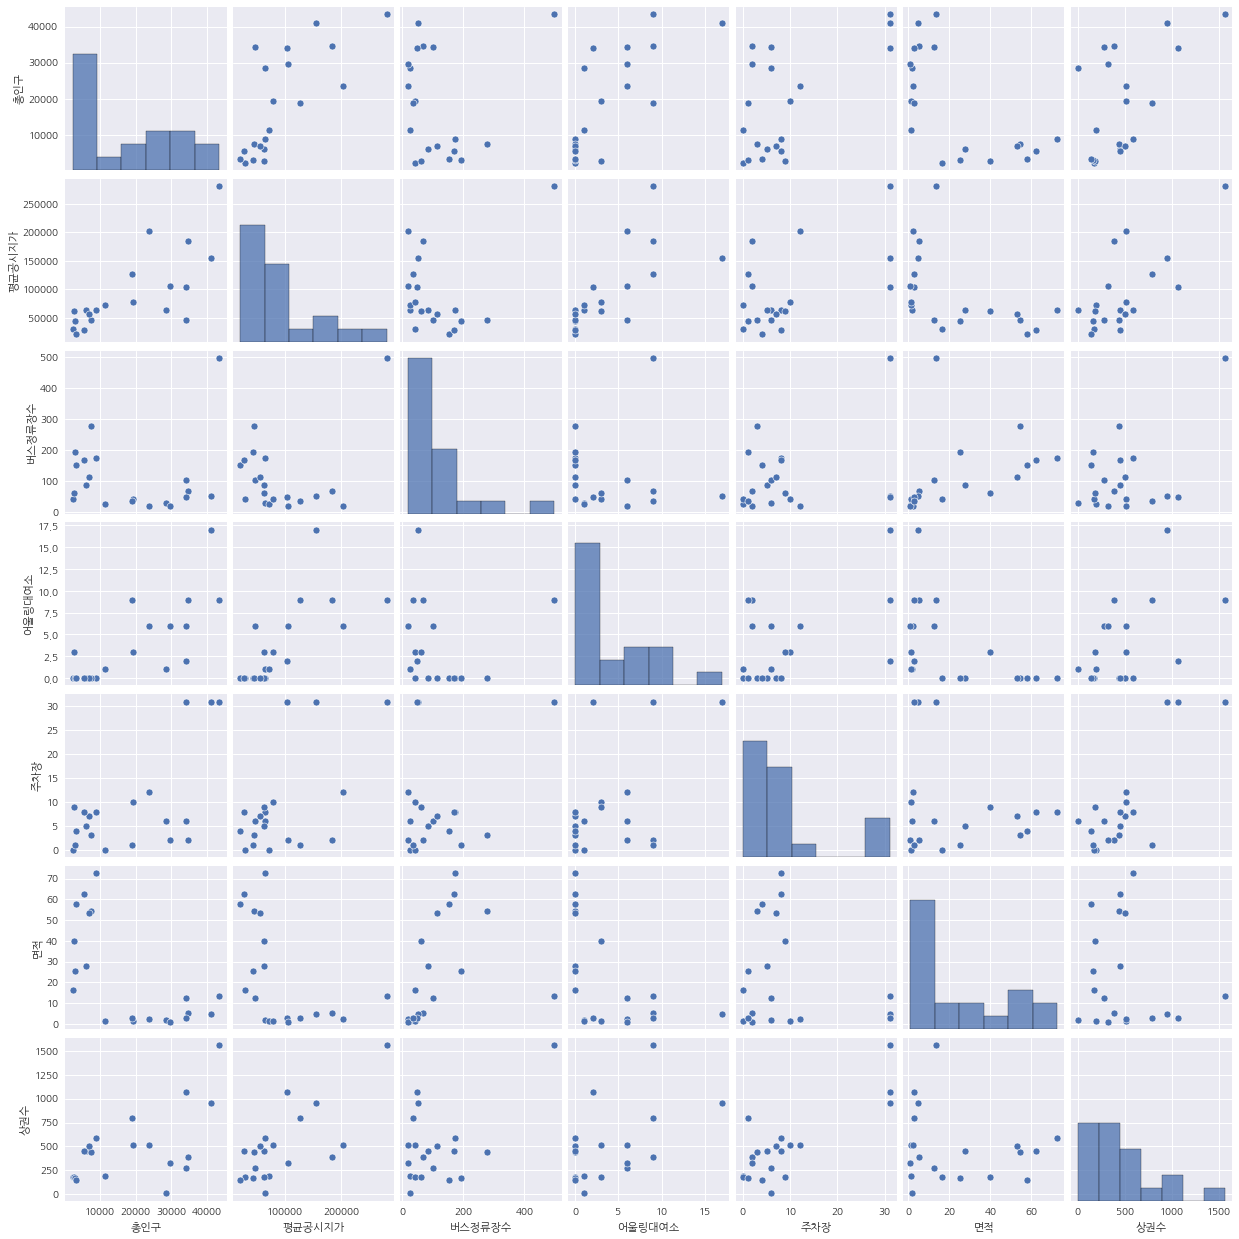

In [ ]:
df_plot = df[['총인구', '평균공시지가', '버스정류장수', '어울링대여소', '주차장', '면적', '상권수']]
sns.pairplot(df_plot)
plt.show()

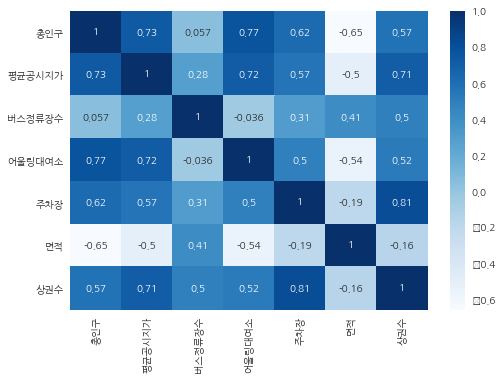

In [ ]:
corr_df = df.corr(method='pearson')
sns.heatmap(corr_df, annot=True, cmap='Blues')
plt.show()

In [ ]:
# 상관이 있는 변수들 (0.6 기준)
# 총인구: 평균공시지가, 어울링대여소, 주차장, 면적
# 평균공시지가: 어울링대여소, 상권수
# 주차장: 상권수

## 파생변수 생성

In [ ]:
# Scaling Methods에 따른 Scaling 함수 생성
def df_scaler(data, cols, scale):
    df_cp = data.copy()
    
    if scale == "minmax":
        X = df_cp.loc[:,cols]
        MinMaxScalers = MinMaxScaler()
        MinMaxScalers.fit(X)
        df_MinMaxScaler = MinMaxScalers.transform(X)
        df_cp.loc[:, cols] = df_MinMaxScaler
    elif scale == "standard" :
        X = df_cp.loc[:,cols]
        StandardScalers = StandardScaler()
        StandardScalers.fit(X)
        df_StandardScalers = StandardScalers.transform(X)
        df_cp.loc[:, cols] = df_StandardScalers
    elif scale == "robust" :
        X = df_cp.loc[:,cols]
        RobustScalers = RobustScaler()
        RobustScalers.fit(X)
        df_RobustScaler = RobustScalers.transform(X)
        df_cp.loc [:, cols] = df_RobustScaler
    else:
        print("wrong")
    return df_cp

In [ ]:
# 버스정류장수, 어울링대여소, 주차장 정규화
data = df.copy()

data['상대버스정류장수'] = df_scaler(data, cols=['버스정류장수'], scale='minmax')['버스정류장수']
data['상대어울링대여소'] = df_scaler(data, cols=['어울링대여소'], scale='minmax')['어울링대여소']
data['상대주차장'] = df_scaler(data, cols=['주차장'], scale='minmax')['주차장']

In [ ]:
# 파생변수 생성
data['상권발달지수'] = data['상권수']/data['면적']
data['인구대비공시지가'] = data['평균공시지가']/data['총인구']
data['교통접근성'] = (0.097/0.545)*data['상대버스정류장수'] + (0.008/0.545)*data['상대어울링대여소'] + (0.44/0.545)*data['상대주차장']
data

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수,상대버스정류장수,상대어울링대여소,상대주차장,상권발달지수,인구대비공시지가,교통접근성
0,고운동,34517,184624.92000,68,9,2.0,5.350,389.0,0.104167,0.529412,0.064516,72.710280,5.348811,0.078397
1,금남면,8974,64802.10870,174,0,8.0,72.500,588.0,0.325000,0.000000,0.258065,8.110345,7.221095,0.266190
2,다정동,28493,64773.30854,27,1,6.0,1.700,5.0,0.018750,0.058824,0.193548,2.941176,2.273306,0.160460
3,대평동,11320,72259.09128,24,1,0.0,1.520,192.0,0.012500,0.058824,0.000000,126.315789,6.383312,0.003088
4,도담동,41059,155268.77490,51,17,31.0,4.720,951.0,0.068750,1.000000,1.000000,201.483051,3.781601,0.834255
5,보람동,19397,78801.26264,43,3,10.0,1.330,514.0,0.052083,0.176471,0.322581,386.466165,4.062549,0.272292
6,부강면,6253,63728.44446,86,0,5.0,27.700,448.0,0.141667,0.000000,0.161290,16.173285,10.191659,0.155430
7,새롬동,33966,104717.54820,49,2,31.0,3.099,1073.0,0.064583,0.117647,1.000000,346.240723,3.083011,0.820561
8,소담동,34201,47194.87080,102,6,6.0,12.720,277.0,0.175000,0.352941,0.193548,21.776730,1.379927,0.192587
9,소정면,2355,29997.12469,41,0,0.0,16.480,177.0,0.047917,0.000000,0.000000,10.740291,12.737633,0.008528


In [ ]:
# 대체적으로 교통접근성이 높아짐

In [ ]:
df[['교통접근성', '상권발달지수', '인구대비공시지가']].describe()

,교통접근성,상권발달지수,인구대비공시지가
count,20.000000,20.000000,20.000000
mean,0.267760,108.036648,7.221096
std,0.281882,132.796510,4.885044
min,0.003088,2.443674,1.379927
25%,0.087799,7.783883,3.992312
50%,0.183747,18.975007,6.305000
75%,0.267715,209.902242,8.226650
max,0.993092,386.466165,22.731451


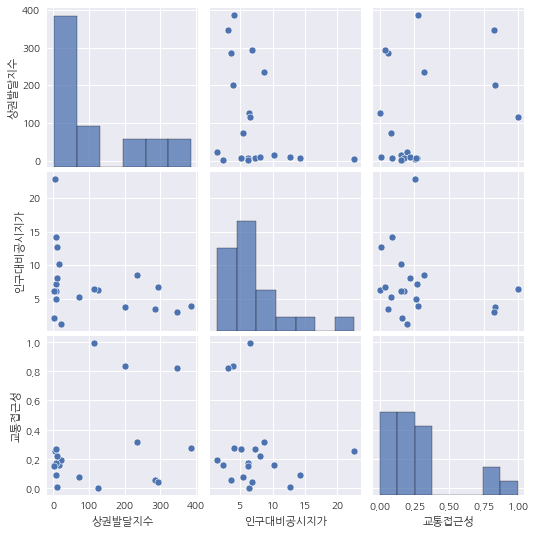

In [ ]:
# 산점도를 통해 '파생변수' 간 분포를 시각적으로 확인 
# 3개의 파생변수 간의 상관성이 높지 않음을 시각적으로 확인
df_plot = df[['상권발달지수', '인구대비공시지가', '교통접근성']]
sns.pairplot(df_plot)
plt.show()

# 클러스터링

## hierarchical clustering

### 상권발달지수, 인구대비공시지가

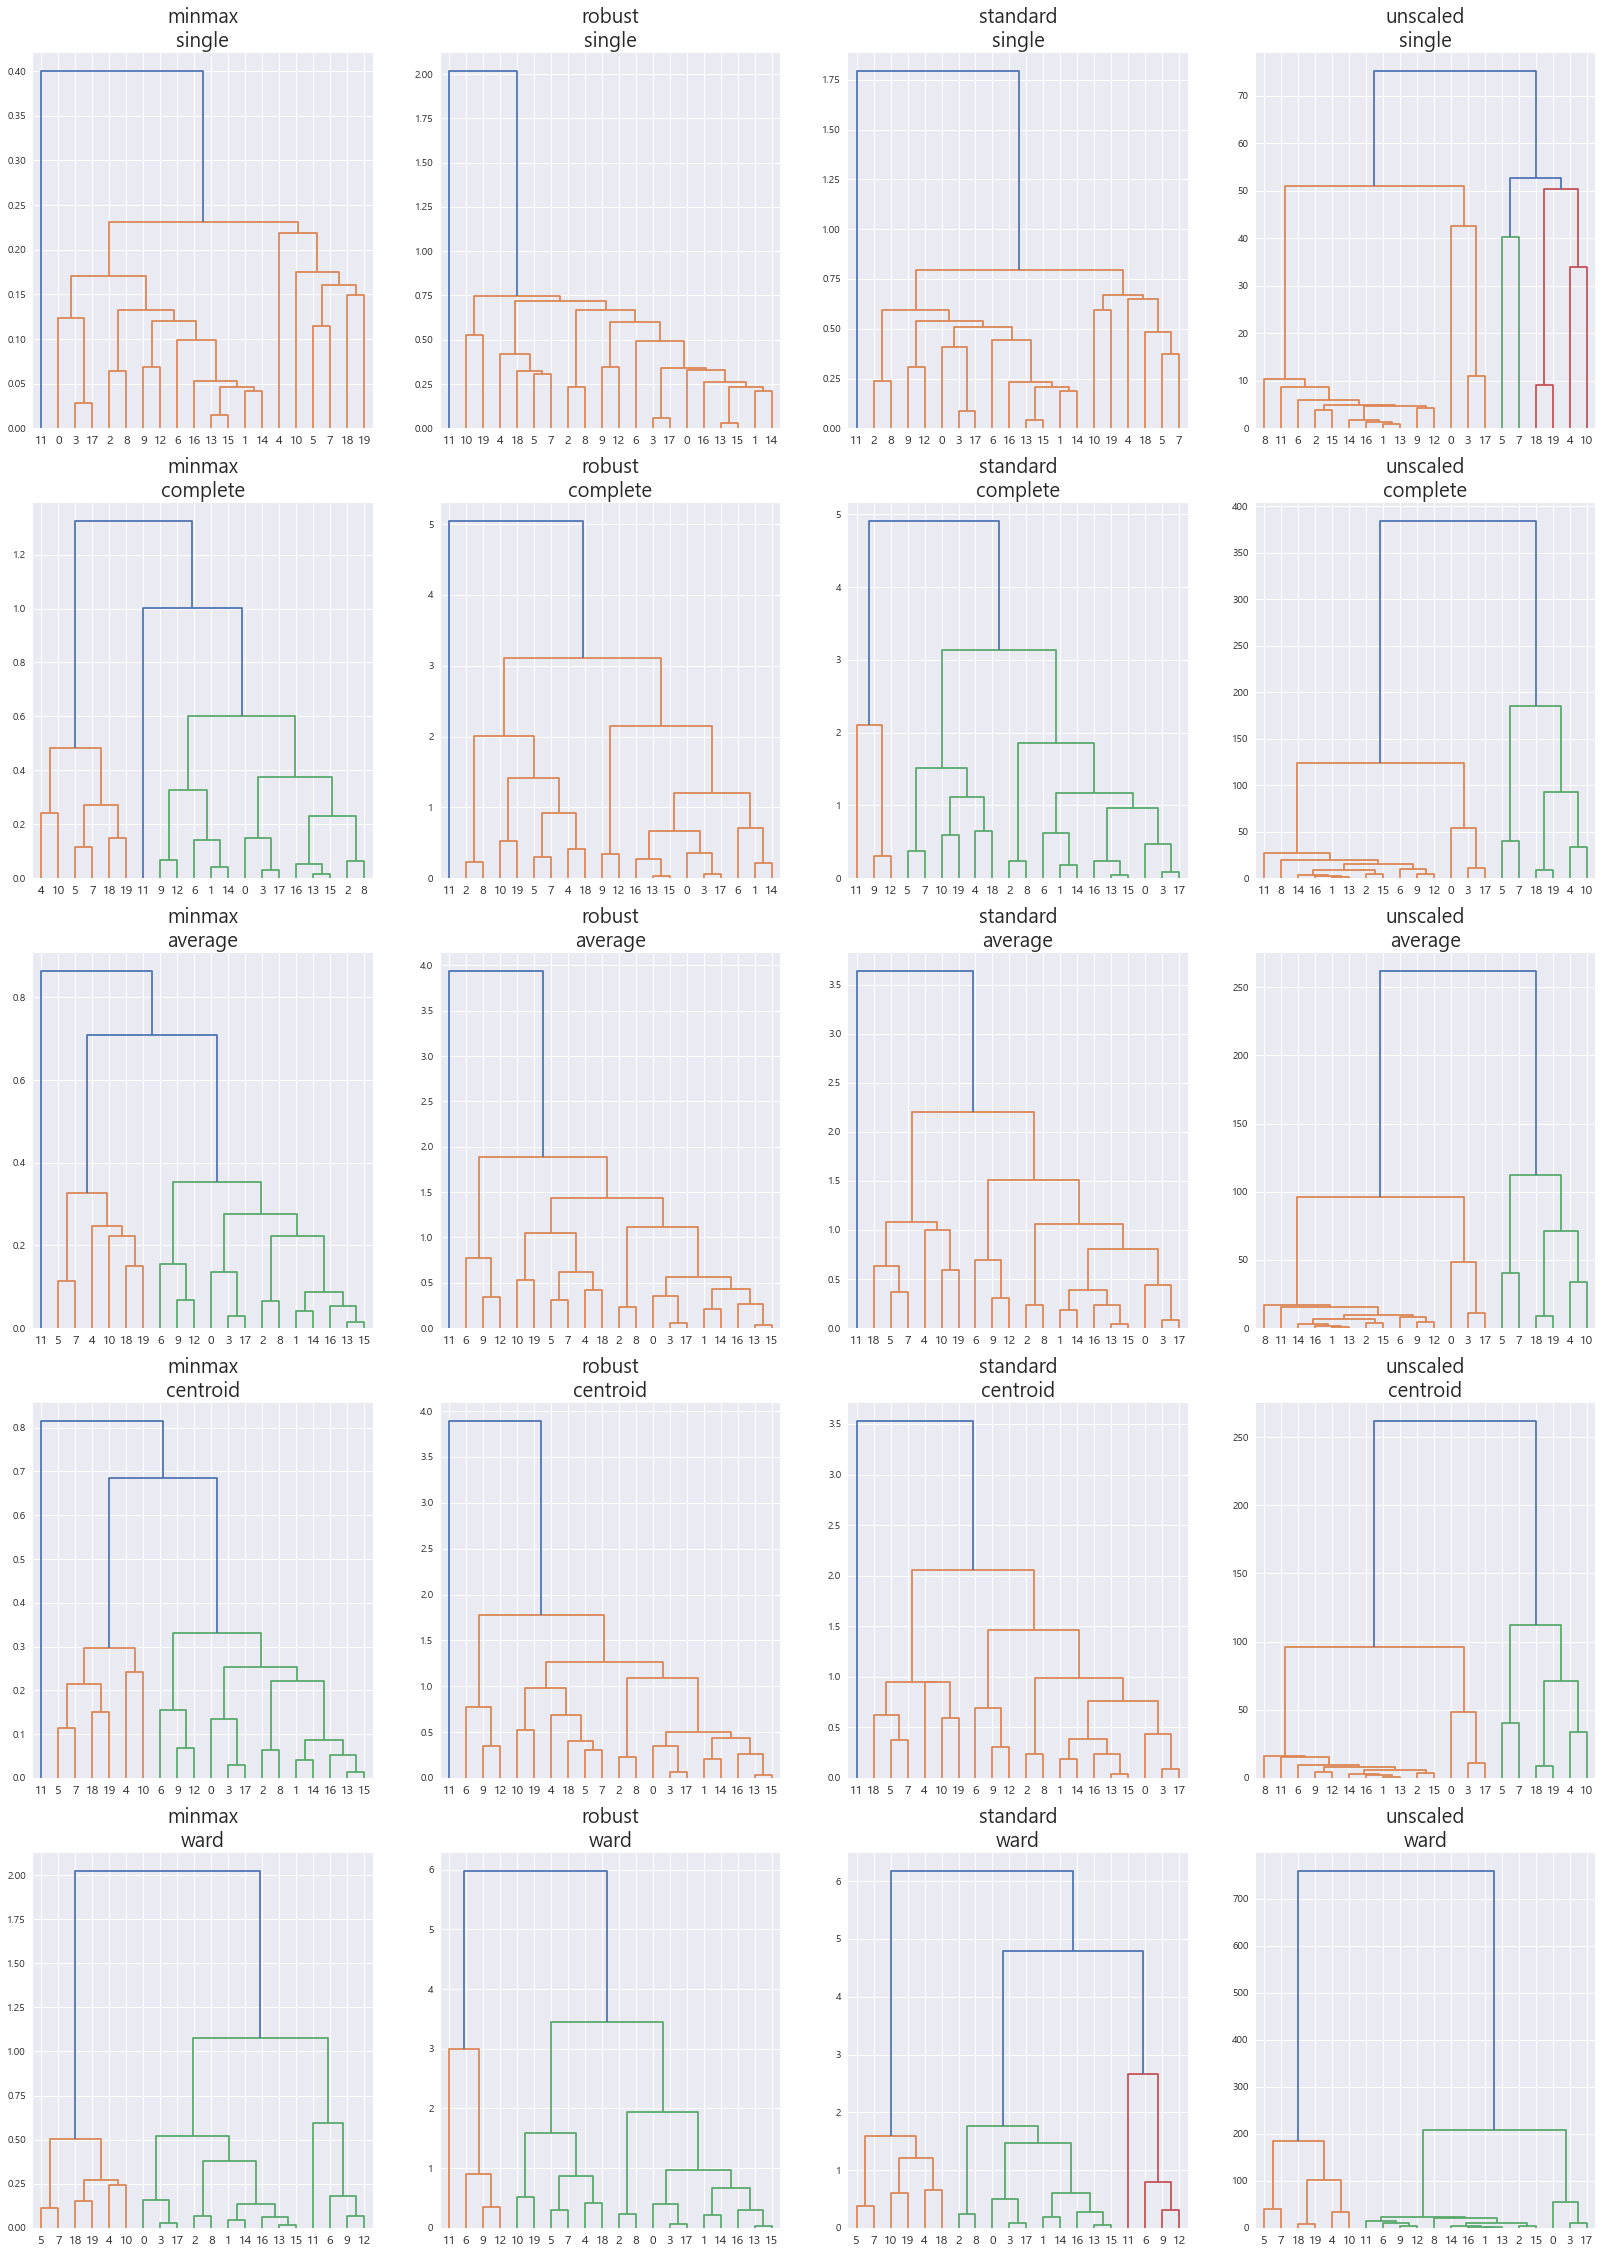

In [ ]:
cols = ['상권발달지수', '인구대비공시지가']
cols_ = ['상권발달지수', '인구대비공시지가'] # 스케일링할 변수
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용

n=len(box)

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=n, figsize=(28, 40))
for i in range(len(linkage_list)):
    for j in range(len(scaler)):
        hierarchical_single = linkage(box[scaler[j]].loc[:,cols], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].set_title(f"{scaler[j]}\n{linkage_list[i]}", fontsize = 20)
        
        
plt.show()

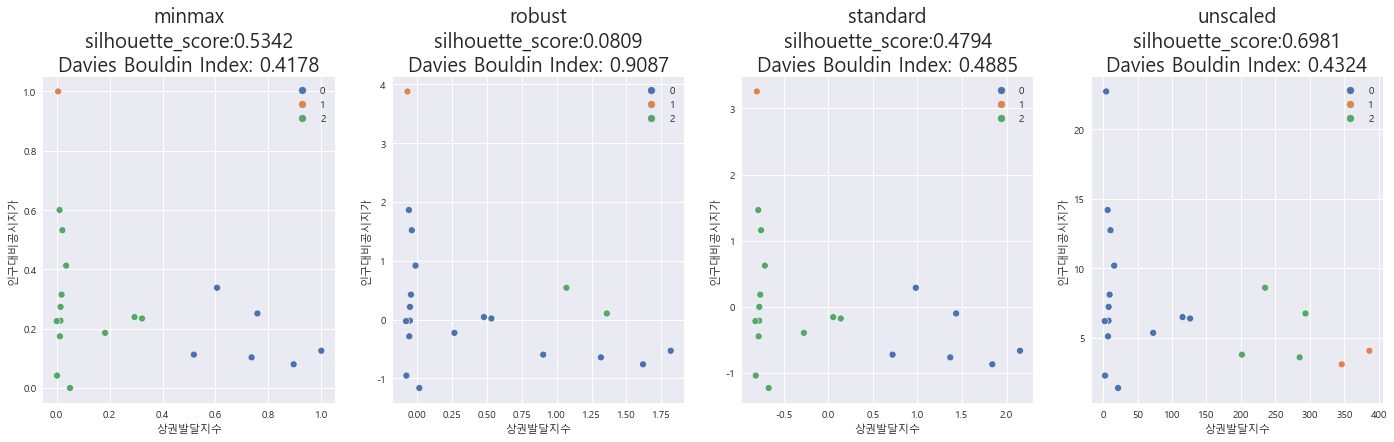

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

In [ ]:
# 군집라벨확인
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')  # 'single', 'complete', 'average', 'centroid', 'ward'
labels = agg_clustering.fit_predict(box[scaler[0]].loc[:,cols])  # 0:'minmax', 1:'robust', 2:'standard', 3:'unscaled'
df['군집라벨'] = labels
df['행정동'] = final['행정동']
df[df['군집라벨'] == 0]

,상권발달지수,인구대비공시지가,군집라벨,행정동
4,201.483051,3.781601,0,도담동
5,386.466165,4.062549,0,보람동
7,346.240723,3.083011,0,새롬동
10,235.159817,8.596513,0,아름동
18,285.217391,3.583883,0,종촌동
19,293.703704,6.745142,0,한솔동


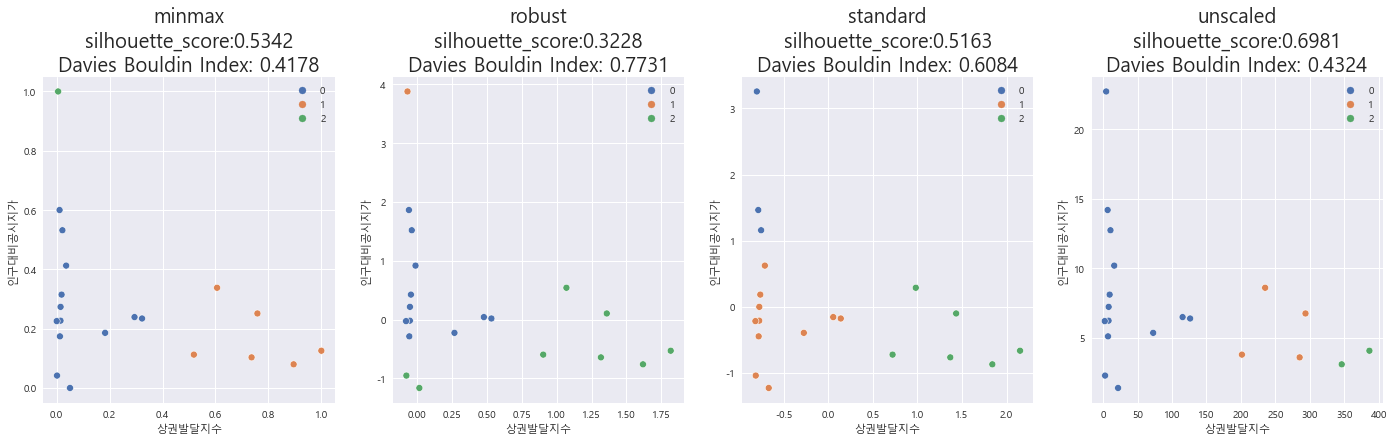

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

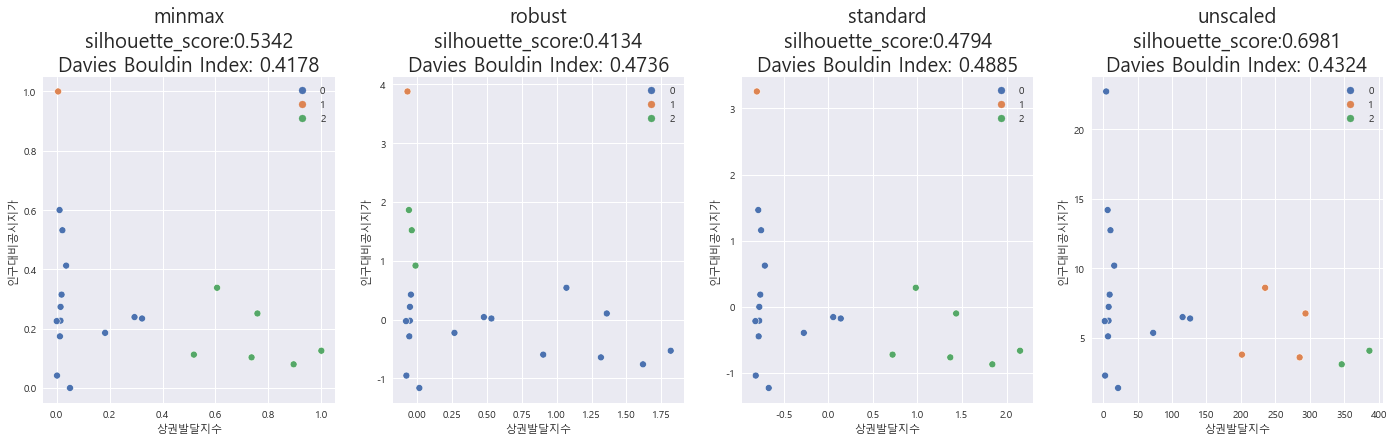

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage= 'average')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

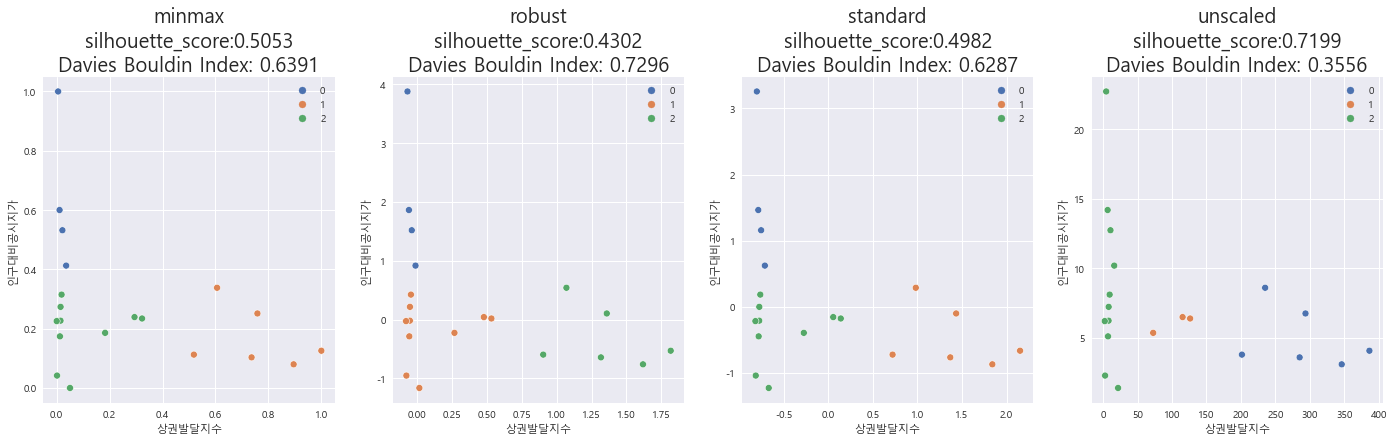

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

### 상권발달지수, 교통접근성 

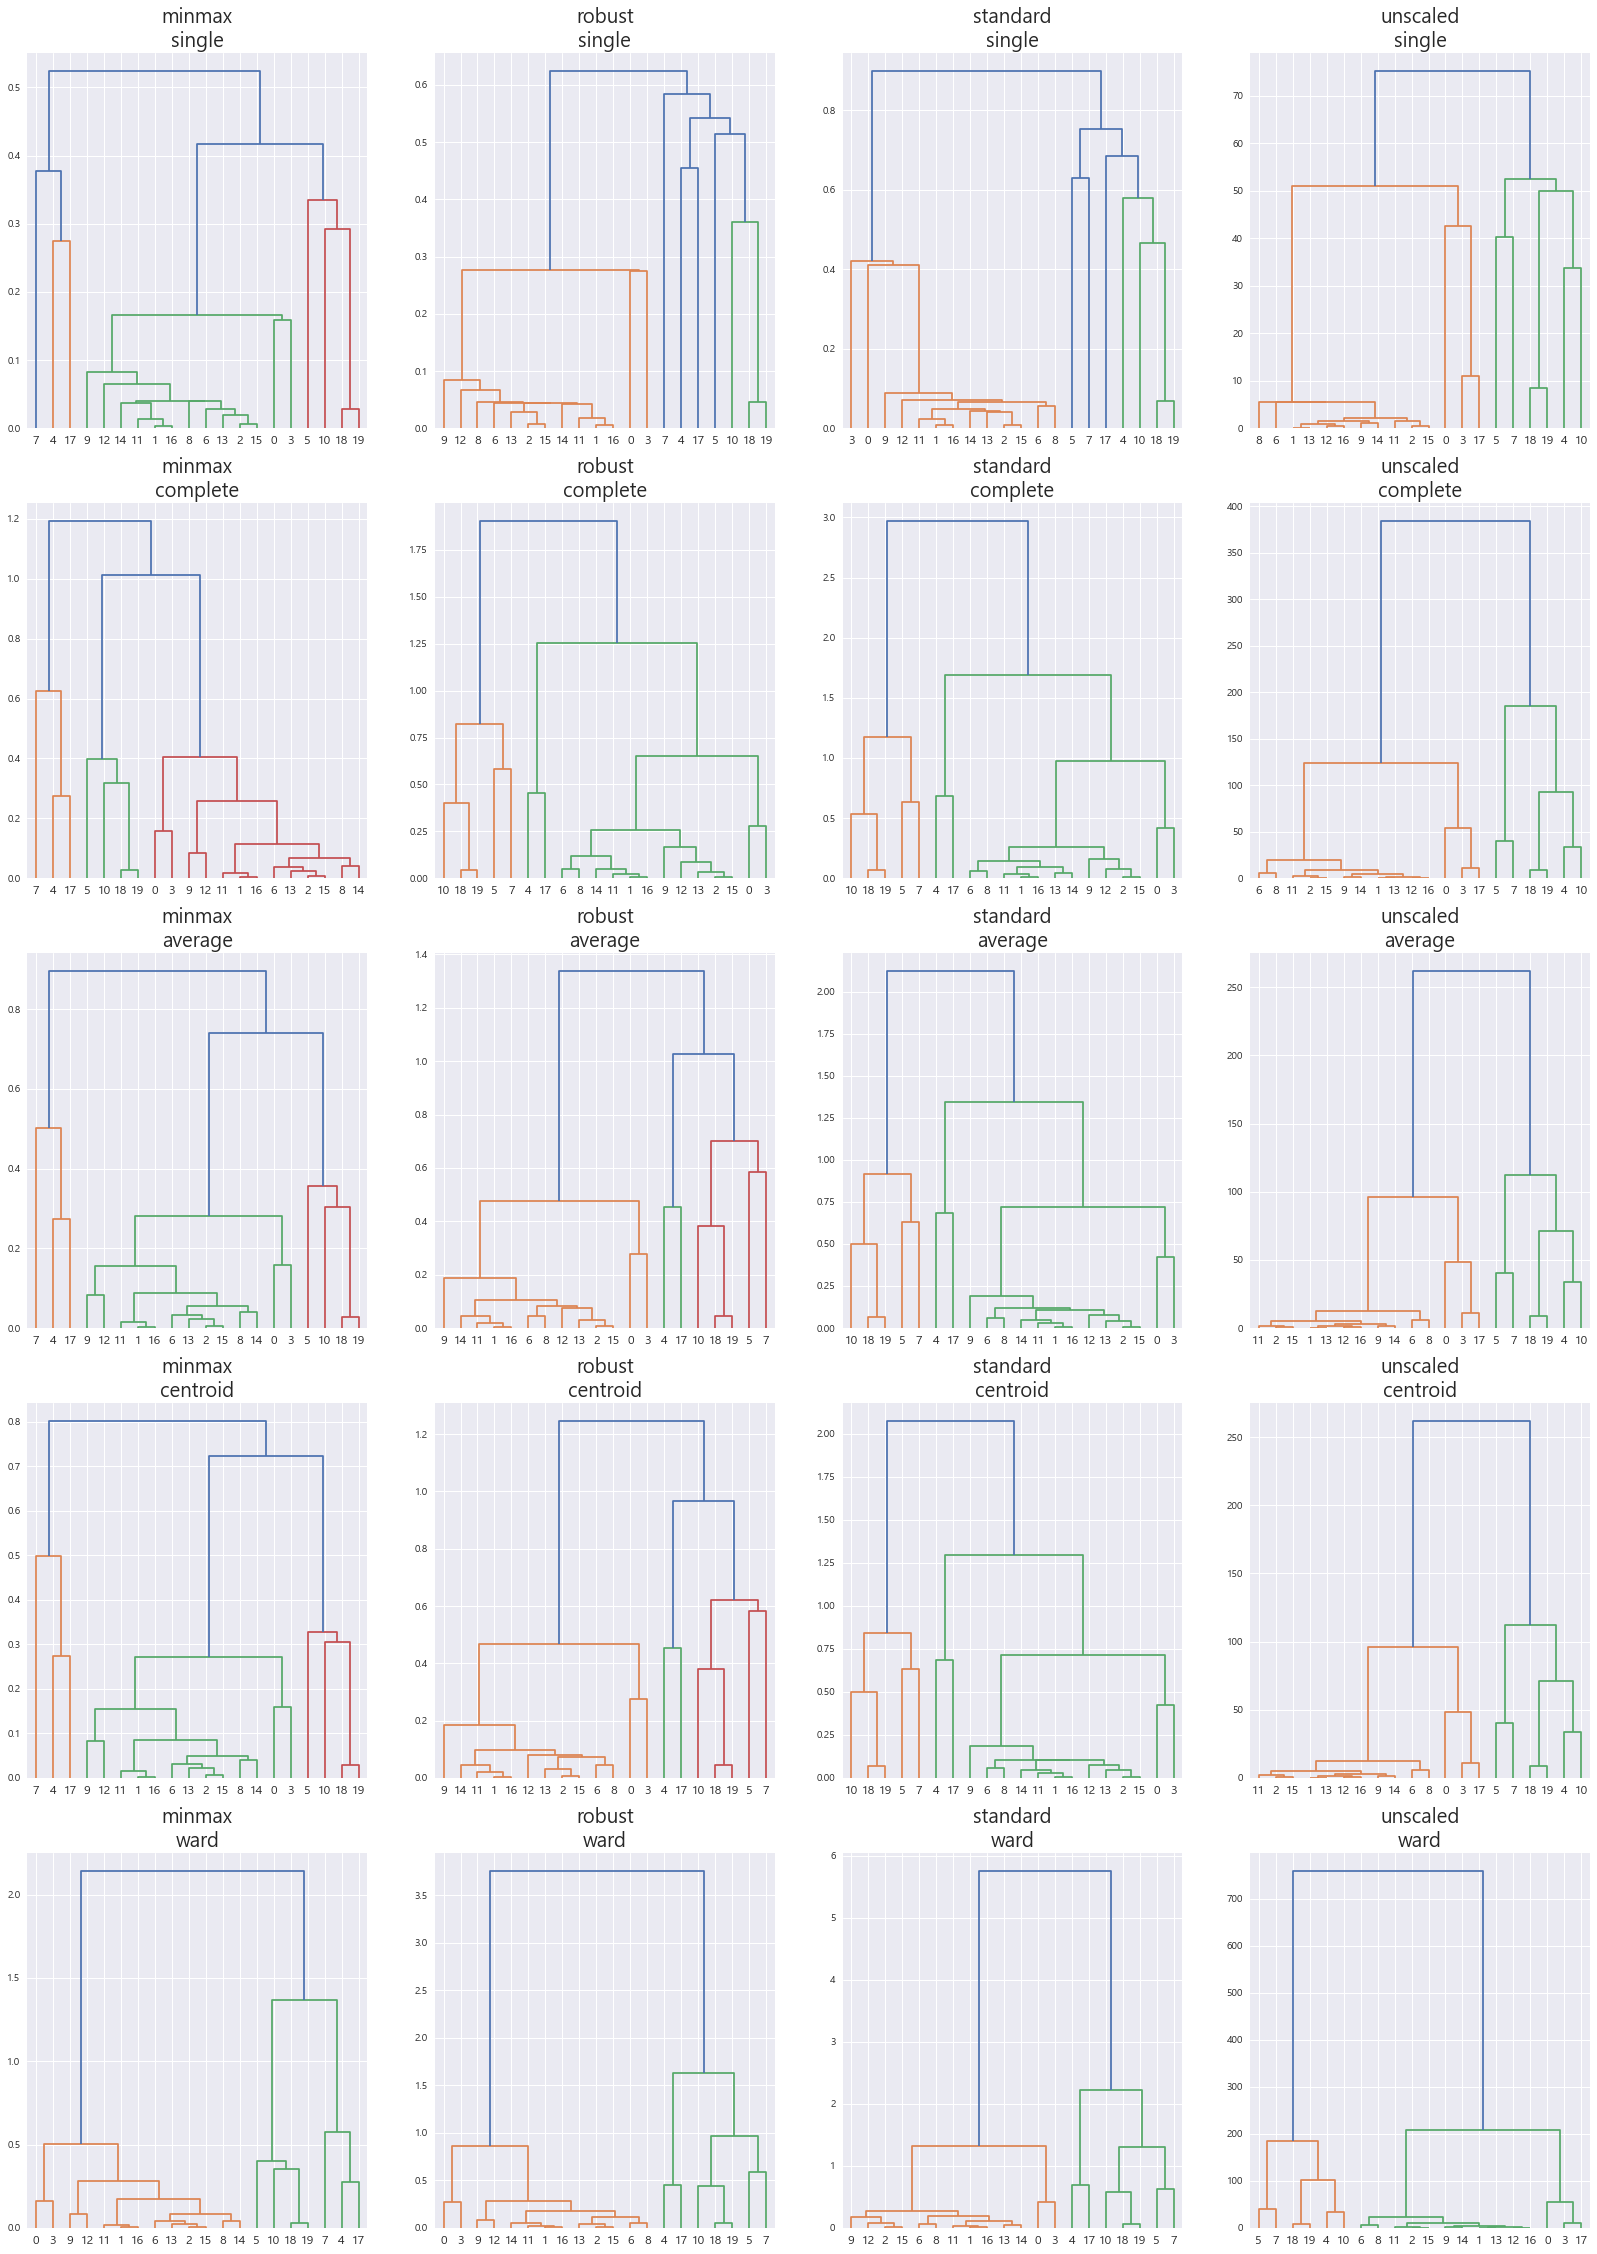

In [ ]:
cols = ['상권발달지수', '교통접근성']
cols_ = ['상권발달지수'] # 스케일링할 변수
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용

n=len(box)

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=n, figsize=(28, 40))
for i in range(len(linkage_list)):
    for j in range(len(scaler)):
        hierarchical_single = linkage(box[scaler[j]].loc[:,cols], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].set_title(f"{scaler[j]}\n{linkage_list[i]}", fontsize = 20)
        
        
plt.show()

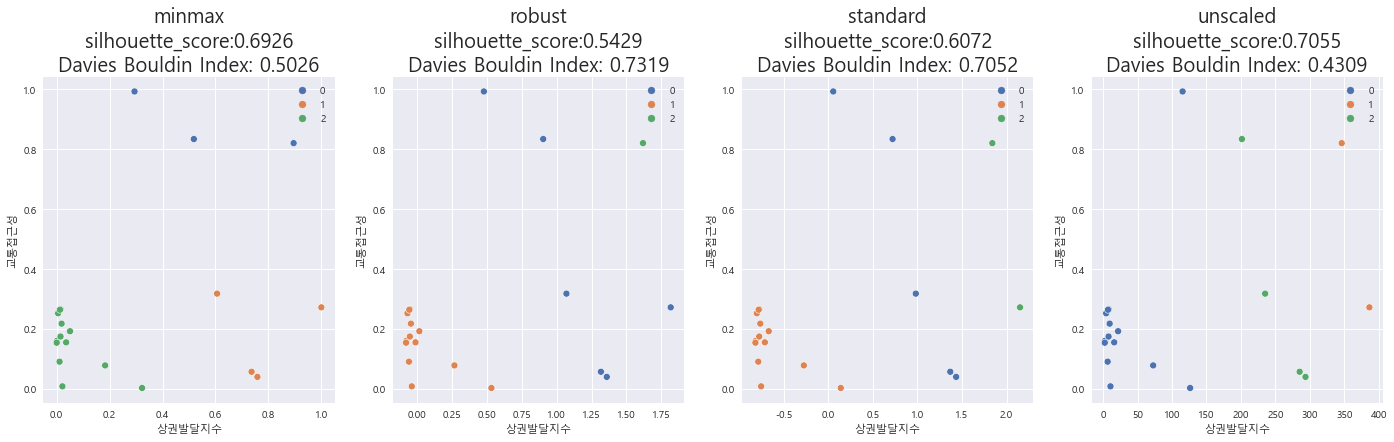

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

In [ ]:
# 군집라벨확인
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')  # 'single', 'complete', 'average', 'centroid', 'ward'
labels = agg_clustering.fit_predict(box[scaler[0]].loc[:,cols])  # 0:'minmax', 1:'robust', 2:'standard', 3:'unscaled'
df['군집라벨'] = labels
df['행정동'] = final['행정동']
df[df['군집라벨'] == 0]

,상권발달지수,교통접근성,군집라벨,행정동
4,201.483051,0.834255,0,도담동
7,346.240723,0.820561,0,새롬동
17,115.376106,0.993092,0,조치원읍


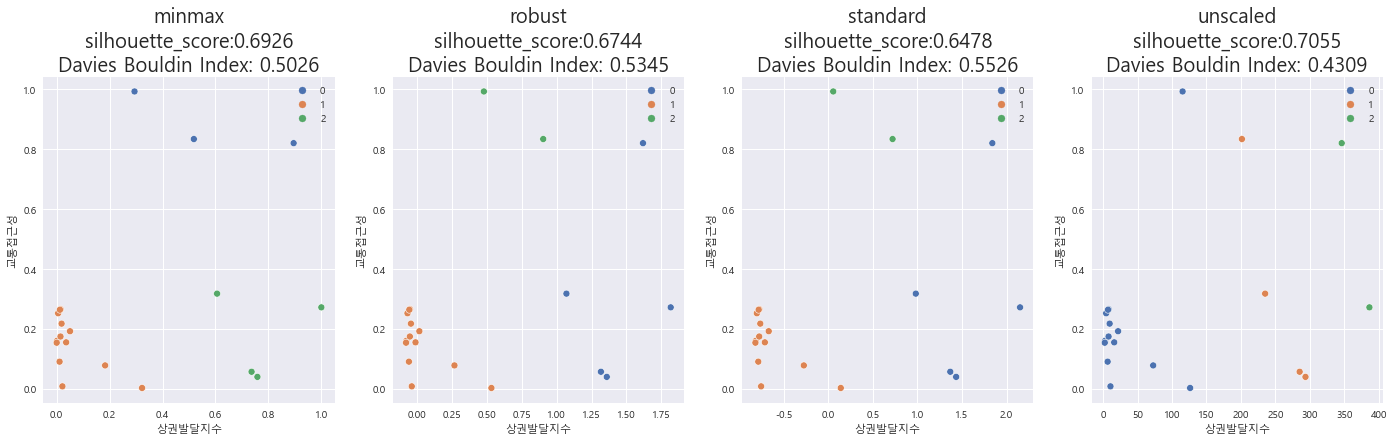

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

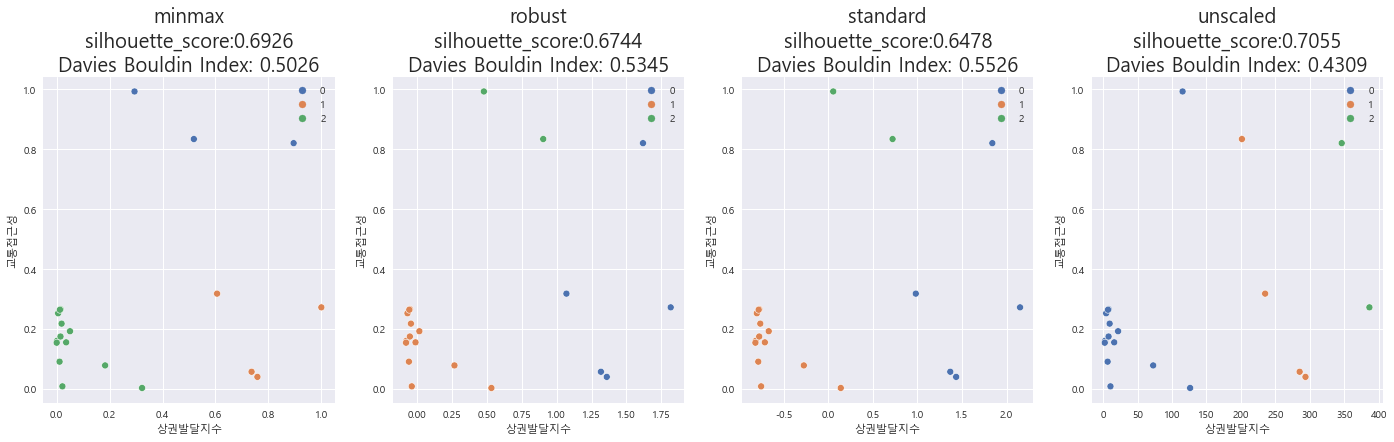

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage= 'average')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

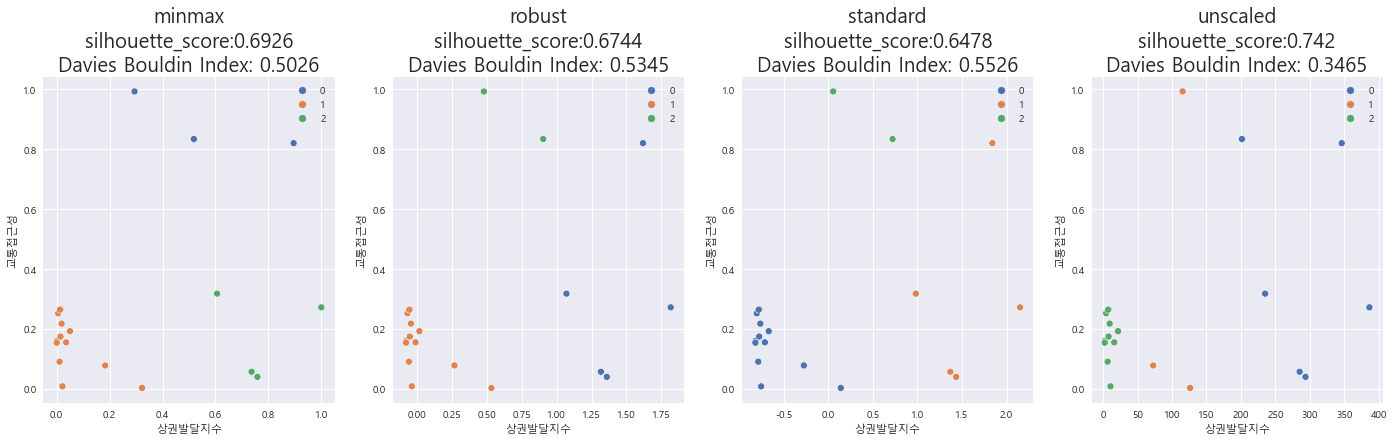

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

### 인구대비공시지가, 교통접근성

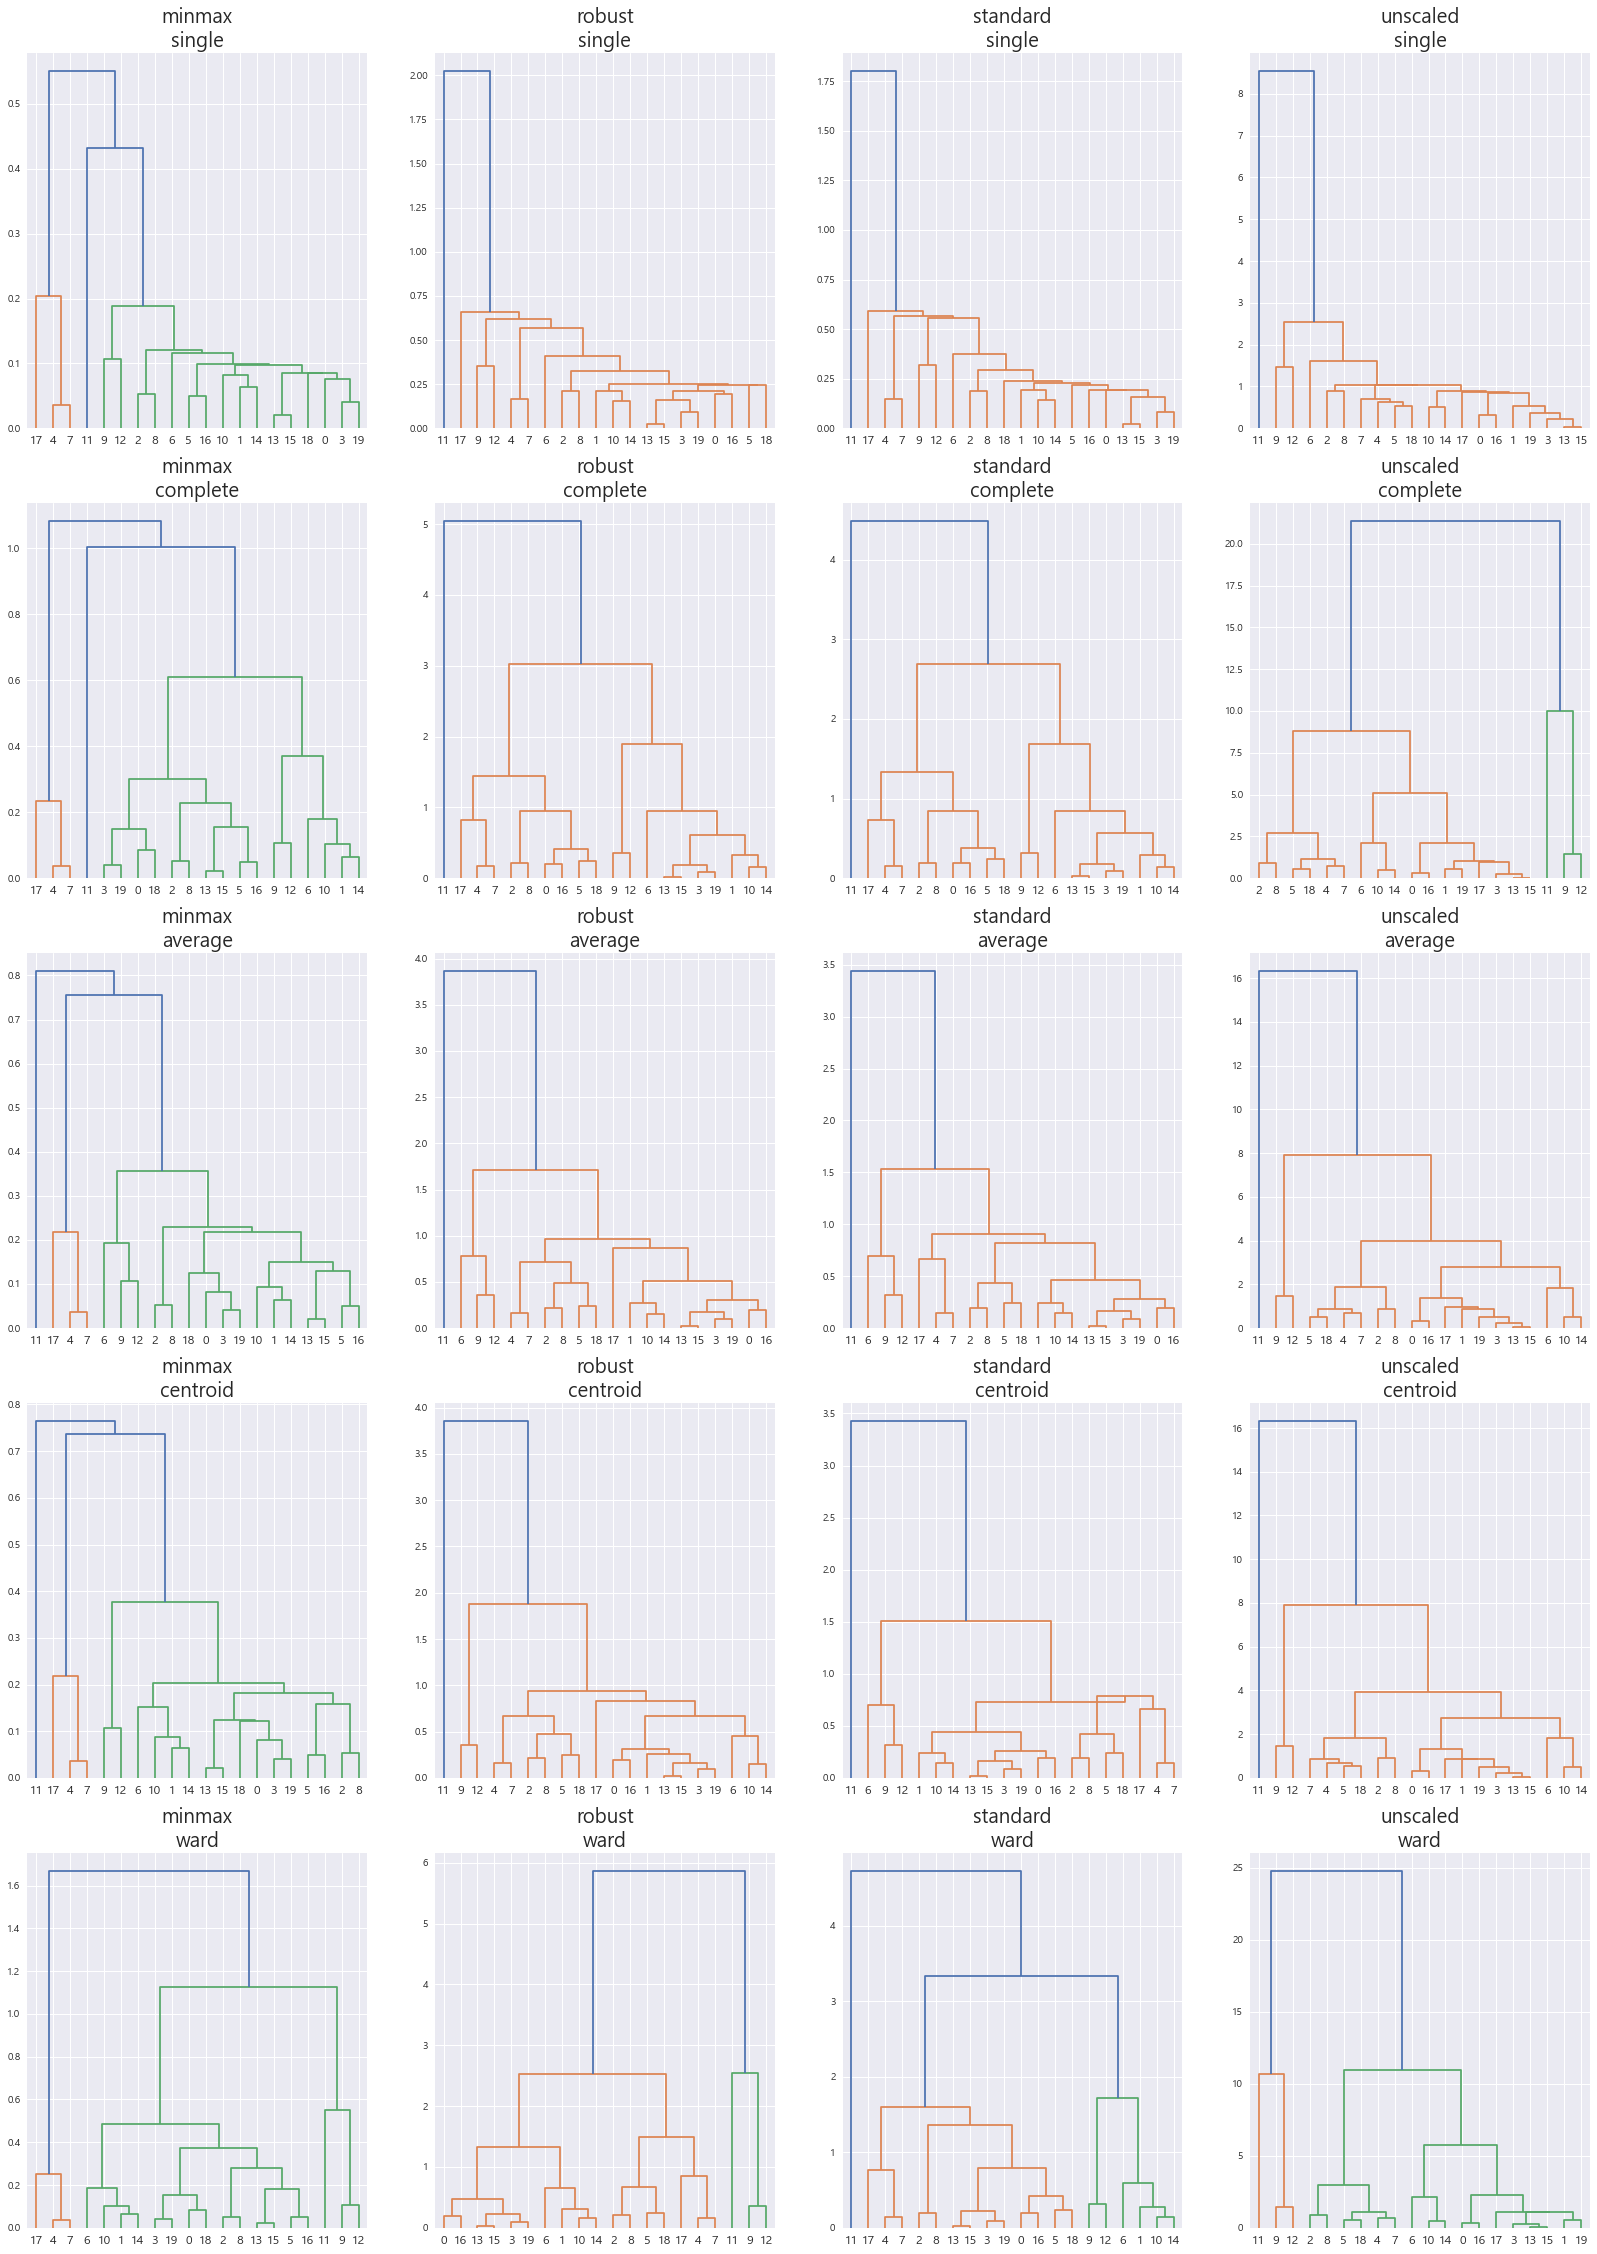

In [ ]:
cols = ['인구대비공시지가', '교통접근성']
cols_ = ['인구대비공시지가'] # 스케일링할 변수
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용

n=len(box)

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=n, figsize=(28, 40))
for i in range(len(linkage_list)):
    for j in range(len(scaler)):
        hierarchical_single = linkage(box[scaler[j]].loc[:,cols], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].set_title(f"{scaler[j]}\n{linkage_list[i]}", fontsize = 20)
        
        
plt.show()

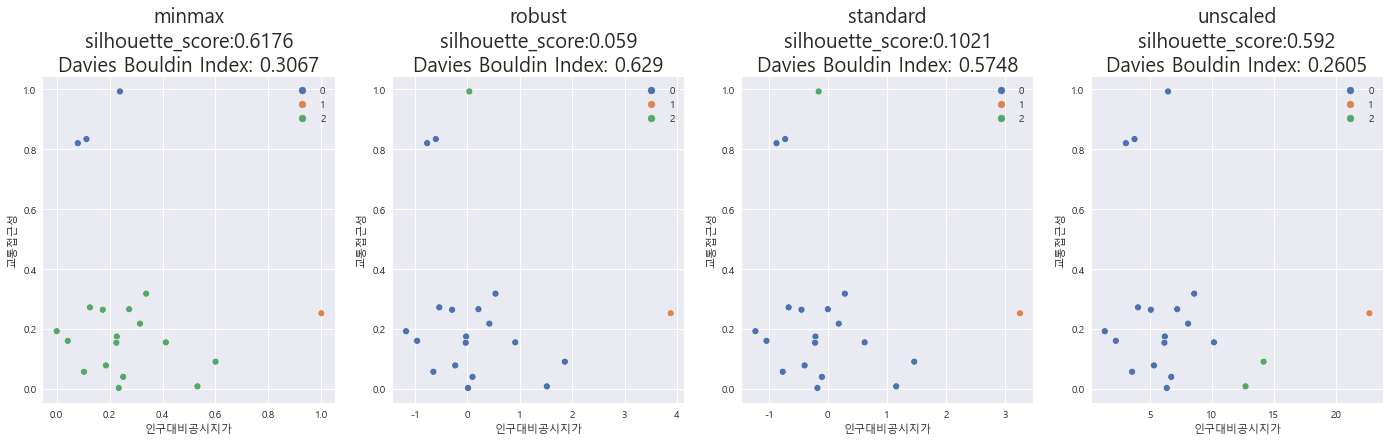

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

In [ ]:
# 군집라벨확인
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')  # 'single', 'complete', 'average', 'centroid', 'ward'
labels = agg_clustering.fit_predict(box[scaler[0]].loc[:,cols])  # 0:'minmax', 1:'robust', 2:'standard', 3:'unscaled'
df['군집라벨'] = labels
df['행정동'] = final['행정동']
df[df['군집라벨'] == 0]

,인구대비공시지가,교통접근성,군집라벨,행정동
4,3.781601,0.834255,0,도담동
7,3.083011,0.820561,0,새롬동
17,6.484930,0.993092,0,조치원읍


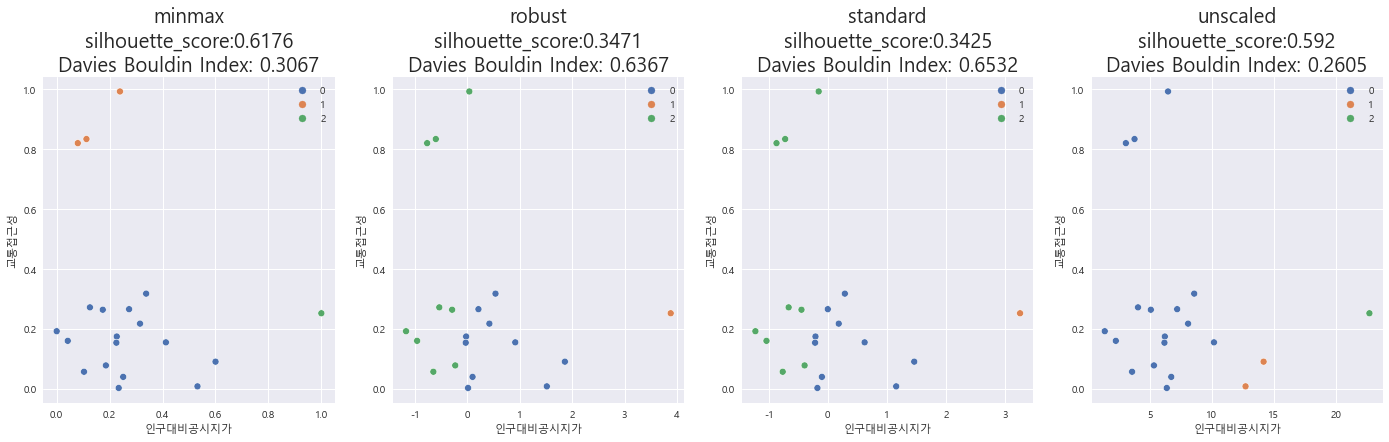

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

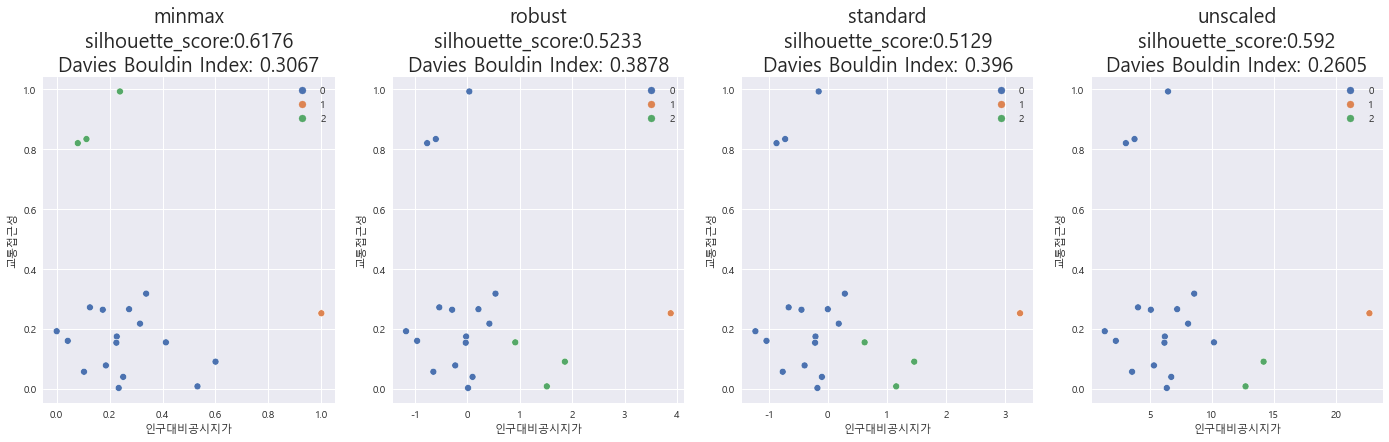

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage= 'average')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

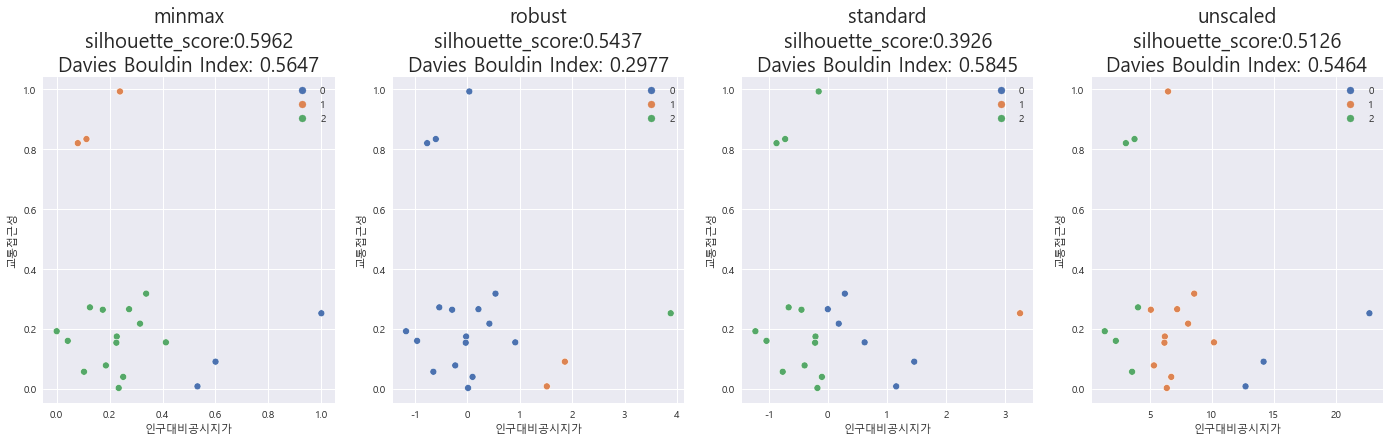

In [ ]:
# Scatter Plot으로 군집화 시각화 확인
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))

for i in range(len(scaler)):
    
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
    labels = agg_clustering.fit_predict(box[scaler[i]].loc[:,cols])
    
    s=sns.scatterplot(x= cols[0], y=cols[1], data= box[scaler[i]], hue=labels, palette='deep', ax = axes[i], marker='o')
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], labels),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],labels),4)}", fontsize = 20)

plt.show()

### 상권발달지수, 인구대비공시지가, 교통접근성

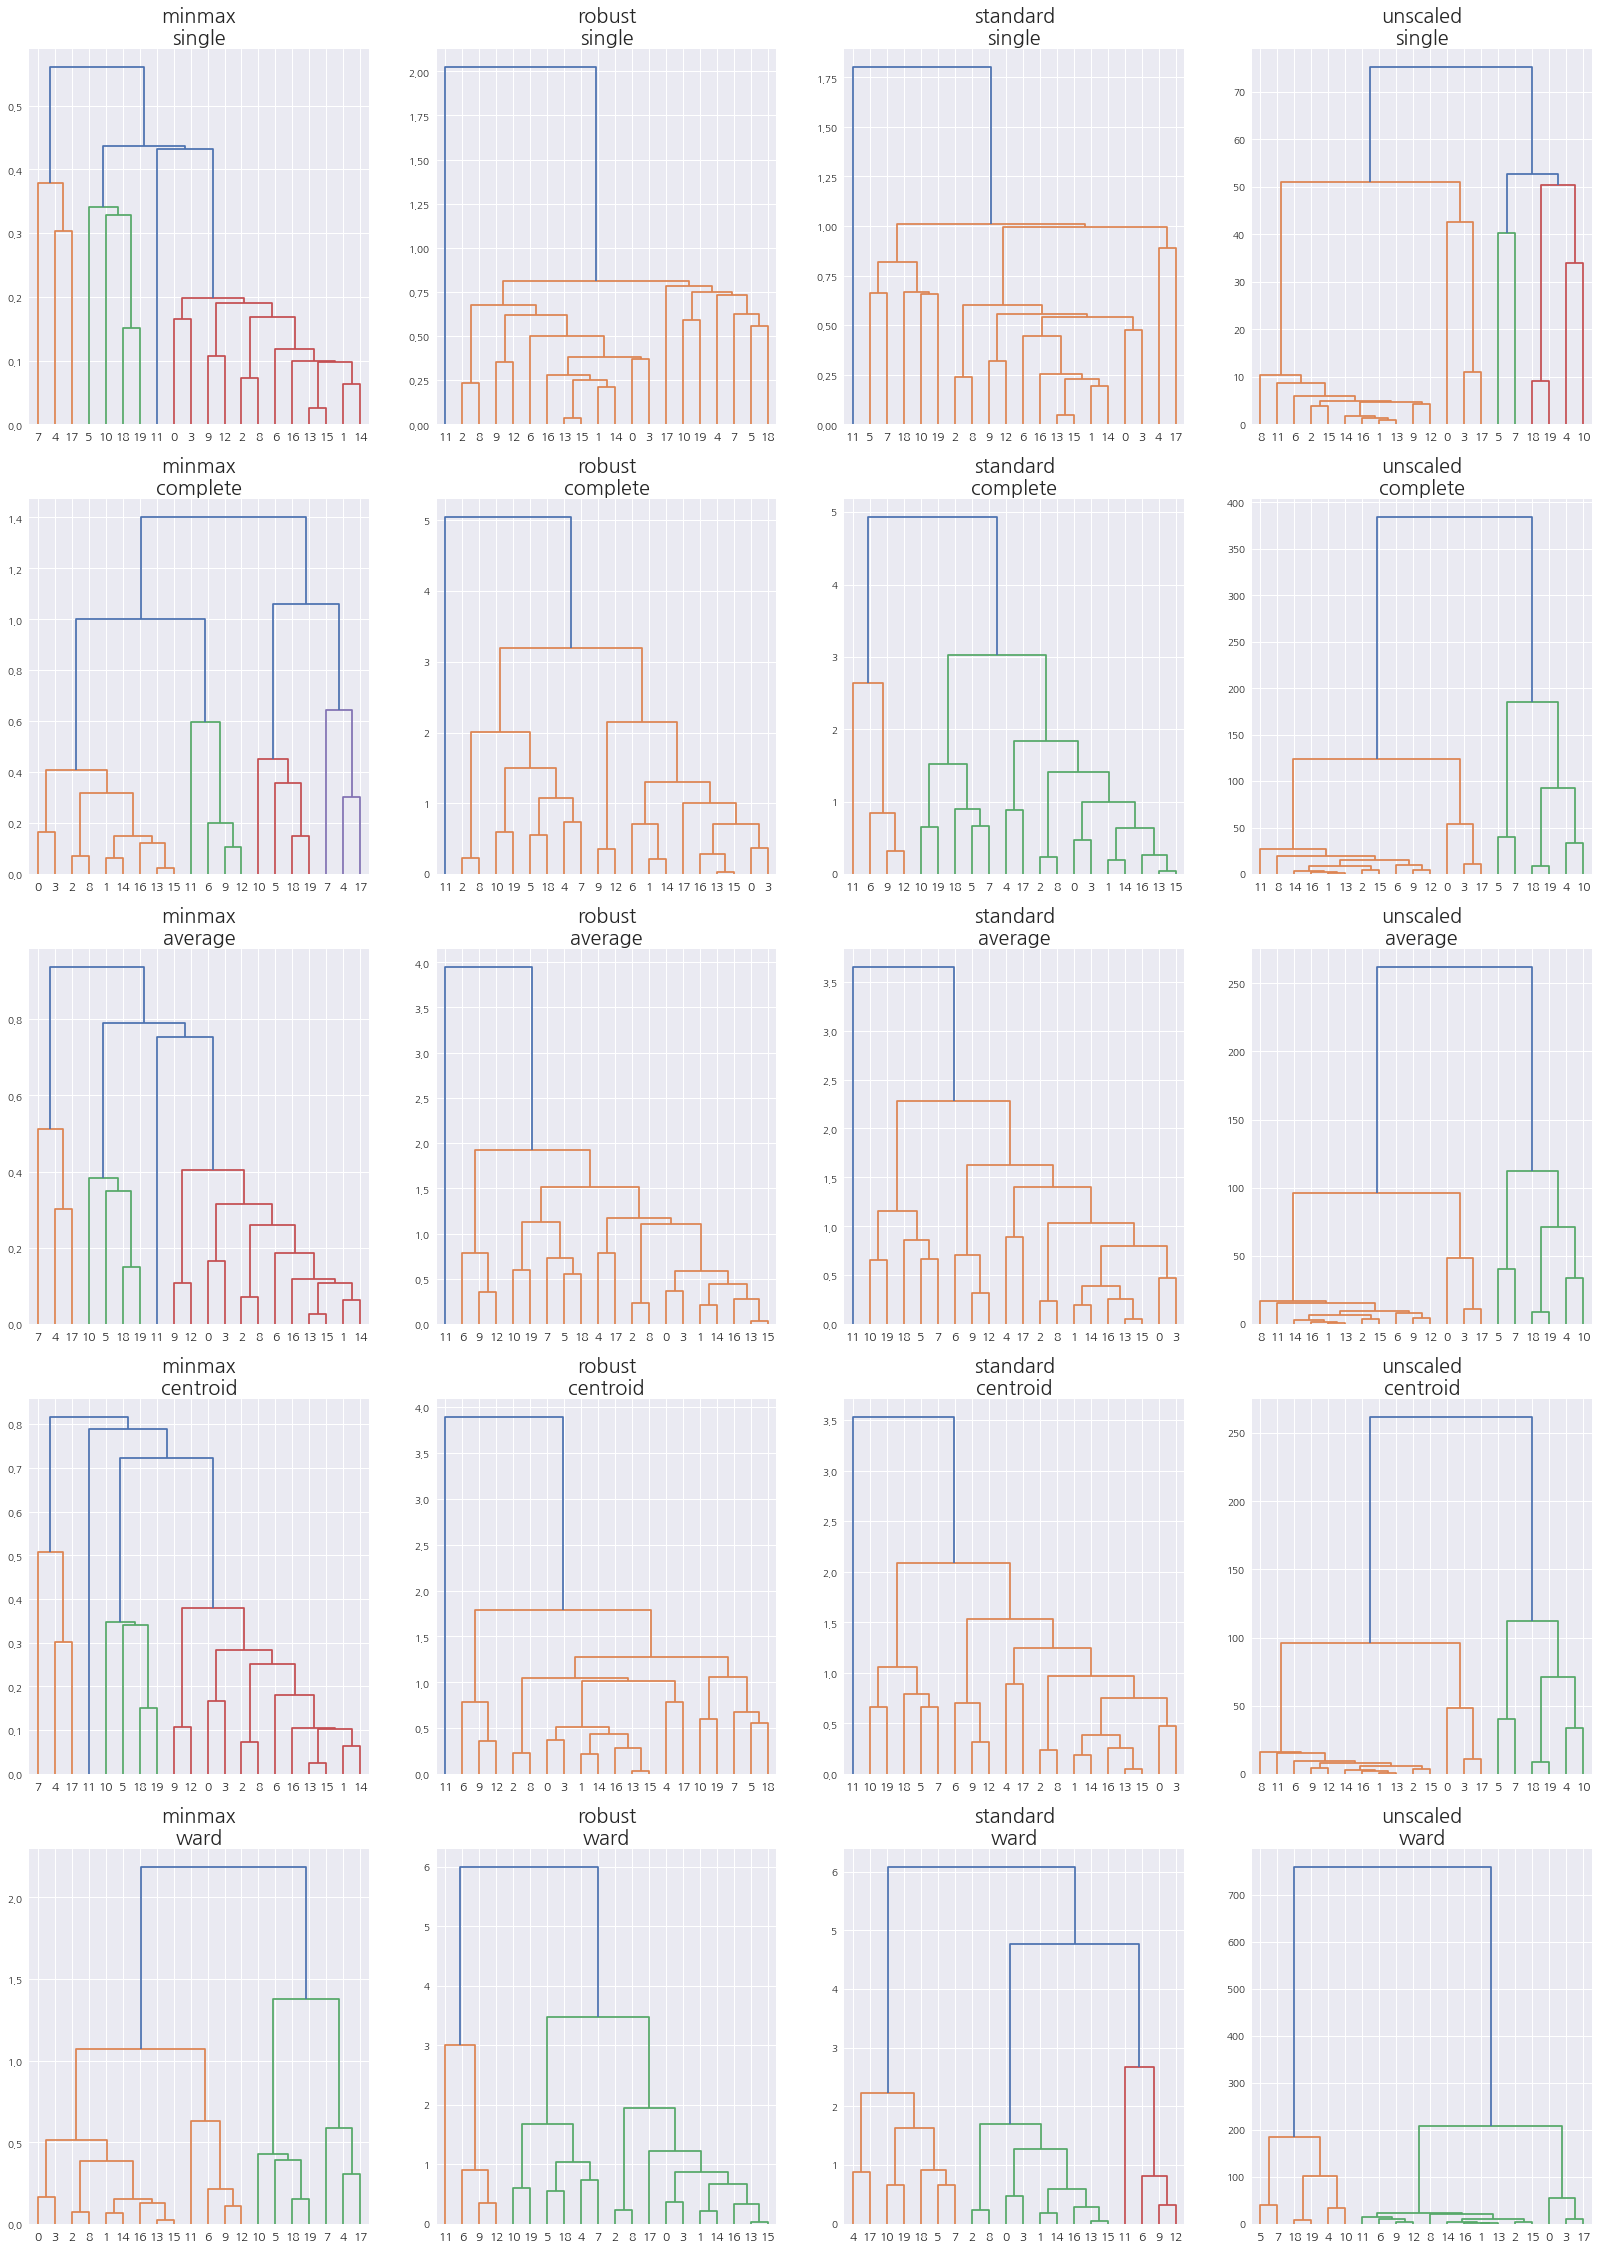

In [ ]:
cols = ['상권발달지수', '인구대비공시지가', '교통접근성']
cols_ = ['상권발달지수', '인구대비공시지가'] # 스케일링할 변수
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용

n=len(box)

linkage_list = ['single', 'complete', 'average', 'centroid', 'ward']

fig, axes = plt.subplots(nrows=len(linkage_list), ncols=n, figsize=(28, 40))
for i in range(len(linkage_list)):
    for j in range(len(scaler)):
        hierarchical_single = linkage(box[scaler[j]].loc[:,cols], method=linkage_list[i])
        dn = dendrogram(hierarchical_single, ax=axes[i][j])
        axes[i][j].set_title(f"{scaler[j]}\n{linkage_list[i]}", fontsize = 20)
        
        
plt.show()

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')  # 'single', 'complete', 'average', 'centroid', 'ward'
labels = agg_clustering.fit_predict(box[scaler[0]].loc[:,cols])  # 0:'minmax', 1:'robust', 2:'standard', 3:'unscaled'
df['군집라벨'] = labels
df['행정동'] = final['행정동']
# df[df['군집라벨'] == 0]
df

,행정동,총인구,평균공시지가,버스정류장수,어울링대여소,주차장,면적,상권수,상대버스정류장수,상대어울링대여소,상대주차장,상권발달지수,인구대비공시지가,교통접근성,군집라벨
0,고운동,34517,184624.92000,68,9,2.0,5.350,389.0,0.104167,0.529412,0.064516,72.710280,5.348811,0.078397,0
1,금남면,8974,64802.10870,174,0,8.0,72.500,588.0,0.325000,0.000000,0.258065,8.110345,7.221095,0.266190,0
2,다정동,28493,64773.30854,27,1,6.0,1.700,5.0,0.018750,0.058824,0.193548,2.941176,2.273306,0.160460,0
3,대평동,11320,72259.09128,24,1,0.0,1.520,192.0,0.012500,0.058824,0.000000,126.315789,6.383312,0.003088,0
4,도담동,41059,155268.77490,51,17,31.0,4.720,951.0,0.068750,1.000000,1.000000,201.483051,3.781601,0.834255,1
5,보람동,19397,78801.26264,43,3,10.0,1.330,514.0,0.052083,0.176471,0.322581,386.466165,4.062549,0.272292,2
6,부강면,6253,63728.44446,86,0,5.0,27.700,448.0,0.141667,0.000000,0.161290,16.173285,10.191659,0.155430,0
7,새롬동,33966,104717.54820,49,2,31.0,3.099,1073.0,0.064583,0.117647,1.000000,346.240723,3.083011,0.820561,1
8,소담동,34201,47194.87080,102,6,6.0,12.720,277.0,0.175000,0.352941,0.193548,21.776730,1.379927,0.192587,0
9,소정면,2355,29997.12469,41,0,0.0,16.480,177.0,0.047917,0.000000,0.000000,10.740291,12.737633,0.008528,0


Text(0.5, 0, '교통접근성')

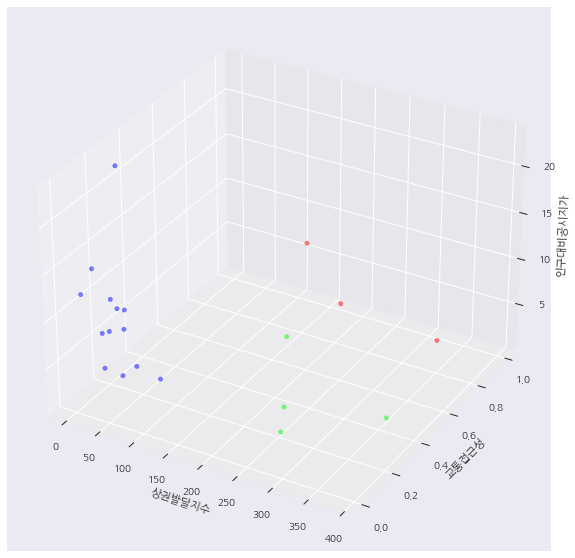

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

model_data = df.copy()

x = model_data['상권발달지수']
z = model_data['인구대비공시지가']
y = model_data['교통접근성']
label = model_data['군집라벨']

ax.scatter(x, y, z, c = label, s= 20, alpha=0.5, cmap='brg')

ax.set_xlabel('상권발달지수')
ax.set_zlabel('인구대비공시지가')
ax.set_ylabel('교통접근성')

## k-means

### 상권발달지수, 인구대비공시지가

In [ ]:
df = data.copy()

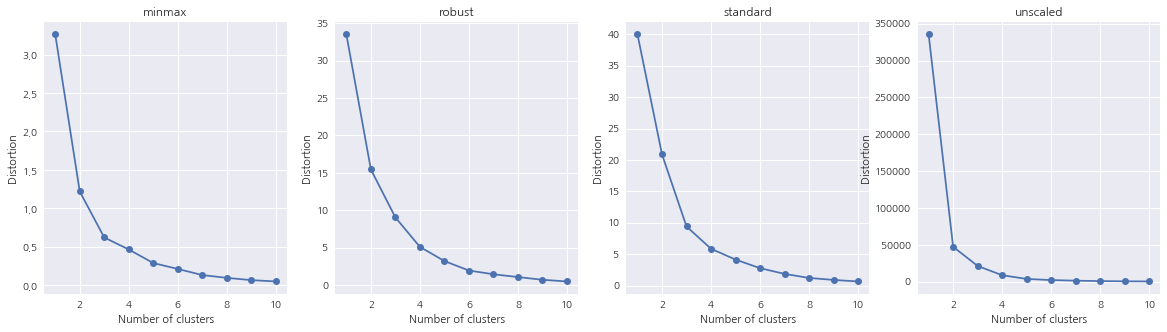

In [ ]:
cols = ['상권발달지수', '인구대비공시지가']
cols_ = ['상권발달지수', '인구대비공시지가']
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용


n = len(box)
fig, axes = plt.subplots(1,n,figsize = (5 * n, 5))
for i in range(len(scaler)):
    distortions = []
    for j in range(1, 11):
        km = KMeans(n_clusters=j)
        km.fit(box[scaler[i]].loc[:,cols])
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음
    
    axes[i].plot(range(1, 11), distortions, marker='o')
    axes[i].set_title(scaler[i])
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Distortion')
plt.show()

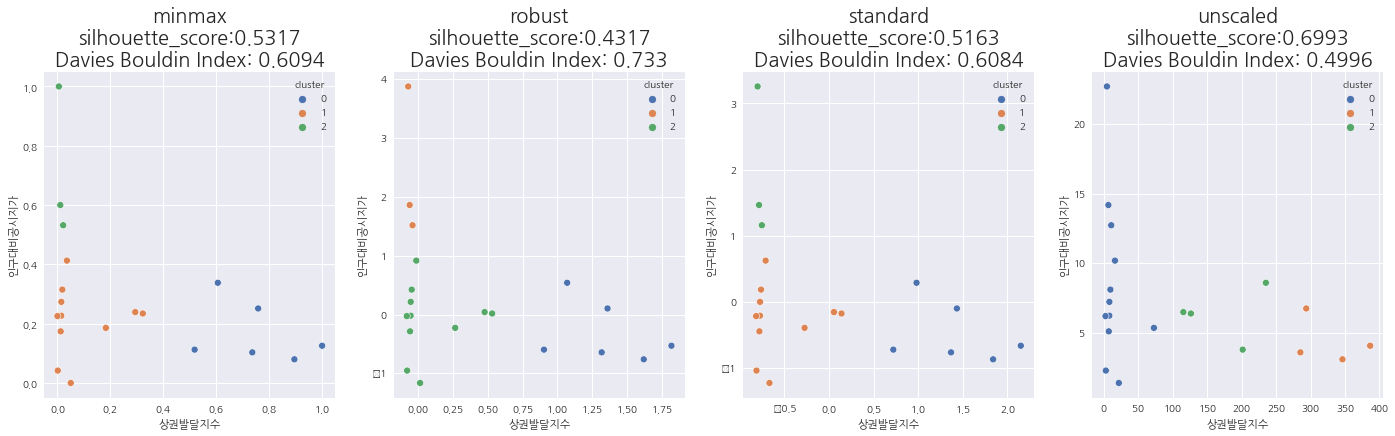

In [ ]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))
for i in range(len(scaler)):
    
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(box[scaler[i]].loc[:,cols])
    box[scaler[i]]['cluster'] = kmeans.labels_
    
    s = sns.scatterplot(x = cols[0], y = cols[1], data = box[scaler[i]], marker='o', hue = 'cluster', palette = 'deep', ax = axes[i])
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], kmeans.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],kmeans.labels_),4)}", fontsize = 20)

    #s.set_xlabel(cols[0])
    #s.set_ylabel(cols[1])
plt.show()

In [ ]:
# minmax 기법이 좋은 것으로 판단됨 (unscaled의 계수가 가장 좋지만, 인구대비공시지가를 구분하지 못함)
# 군집0. 상권발달지수가 높고 인구대비공시지가가 낮은 읍면동 <<<<<
# 군집1. 상권발달지수가, 인구대비공시지가가 낮은 읍면동
# 군집2. 상권발달지수가 낮고 인구대비공시지가가 높은 읍면동

In [ ]:
# 최종 선택
cols = ['상권발달지수', '인구대비공시지가']
data = df.copy()
data['상권발달지수'] = df_scaler(data, cols=['상권발달지수'], scale="minmax")['상권발달지수']
data['인구대비공시지가'] = df_scaler(data, cols=['인구대비공시지가'], scale="minmax")['인구대비공시지가']
dataset = data.copy()
dataset = dataset[cols]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)
y_pred =kmeans.labels_
model_data = dataset.copy()
model_data['교통접근성'] = data['교통접근성']
model_data["cluster"] = y_pred
model_data["행정동"] = data["행정동"]

In [ ]:
# 관심 군집에 해당되는 읍면동
model_data[model_data['cluster']==0]

,상권발달지수,인구대비공시지가,교통접근성,cluster,행정동
4,0.518301,0.112483,0.834255,0,도담동
5,1.000000,0.125641,0.272292,0,보람동
7,0.895252,0.079764,0.820561,0,새롬동
10,0.605996,0.337989,0.318070,0,아름동
18,0.736347,0.103222,0.057267,0,종촌동
19,0.758445,0.251280,0.040118,0,한솔동


### 상권발달지수, 교통접근성

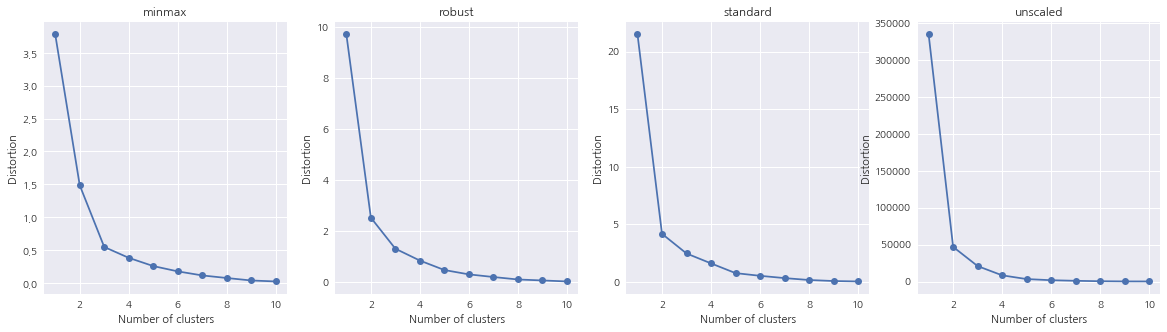

In [ ]:
cols = ['상권발달지수', '교통접근성']
cols_ = ['상권발달지수']
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용


n = len(box)
fig, axes = plt.subplots(1,n,figsize = (5 * n, 5))
for i in range(len(scaler)):
    distortions = []
    for j in range(1, 11):
        km = KMeans(n_clusters=j)
        km.fit(box[scaler[i]].loc[:,cols])
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음
    
    axes[i].plot(range(1, 11), distortions, marker='o')
    axes[i].set_title(scaler[i])
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Distortion')
plt.show()

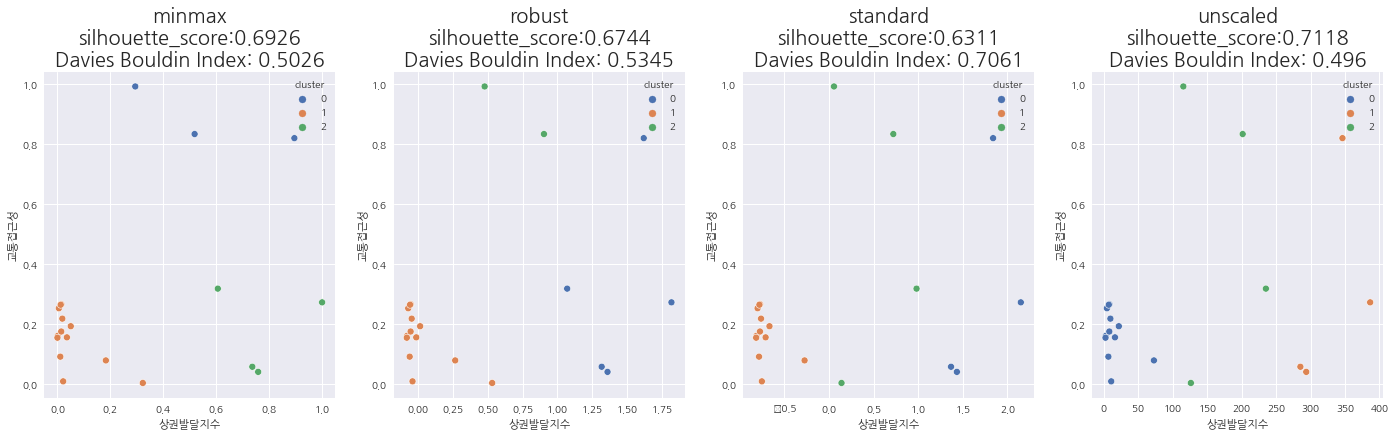

In [ ]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))
for i in range(len(scaler)):
    
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(box[scaler[i]].loc[:,cols])
    box[scaler[i]]['cluster'] = kmeans.labels_
    
    s = sns.scatterplot(x = cols[0], y = cols[1], data = box[scaler[i]], marker='o', hue = 'cluster', palette = 'deep', ax = axes[i])
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], kmeans.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],kmeans.labels_),4)}", fontsize = 20)

    #s.set_xlabel(cols[0])
    #s.set_ylabel(cols[1])
plt.show()

In [ ]:
# minmax 기법이 좋은 것으로 판단됨
# (unscaled의 수치가 가장 좋으나 교통접근성으로 세부적으로 고려하지 못함)
# 군집0. 상권발달지수가 보통이고 교통접근성이 높은 읍면동 <<<<<
# 군집1. 상권발달지수, 교통접근성이 낮은 읍면동
# 군집2. 상권발달지수가 높고 교통접근성이 낮은 읍면동

In [ ]:
# 최종 선택
cols = ['상권발달지수', '교통접근성']
data = df.copy()
data['상권발달지수'] = df_scaler(data, cols=['상권발달지수'], scale="minmax")['상권발달지수']
# df['인구대비공시지가'] = df_scaler(df, cols=['인구대비공시지가'], scale="minmax")['인구대비공시지가']
dataset = data.copy()
dataset = dataset[cols]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)
y_pred =kmeans.labels_
model_data = dataset.copy()
model_data['인구대비공시지가'] = data['인구대비공시지가']
model_data["cluster"] = y_pred
model_data["행정동"] = data["행정동"]

In [ ]:
# 관심 군집에 해당되는 읍면동
model_data[(model_data['cluster']==0)]

,상권발달지수,교통접근성,인구대비공시지가,cluster,행정동
4,0.518301,0.834255,3.781601,0,도담동
7,0.895252,0.820561,3.083011,0,새롬동
17,0.294078,0.993092,6.484930,0,조치원읍


### 인구대비공시지가, 교통접근성

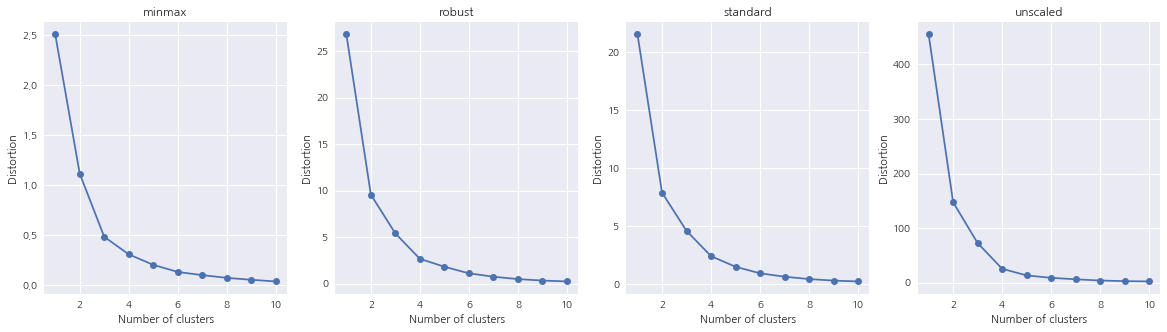

In [ ]:
cols = ['인구대비공시지가', '교통접근성']
cols_ = ['인구대비공시지가']
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용


n = len(box)
fig, axes = plt.subplots(1,n,figsize = (5 * n, 5))
for i in range(len(scaler)):
    distortions = []
    for j in range(1, 11):
        km = KMeans(n_clusters=j)
        km.fit(box[scaler[i]].loc[:,cols])
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음
    
    axes[i].plot(range(1, 11), distortions, marker='o')
    axes[i].set_title(scaler[i])
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Distortion')
plt.show()

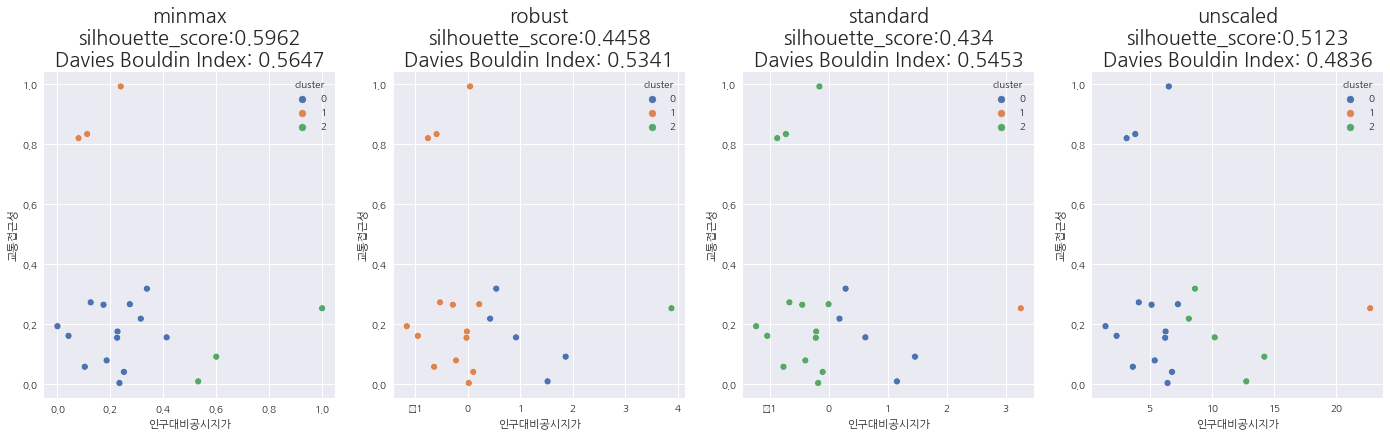

In [ ]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))
for i in range(len(scaler)):
    
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(box[scaler[i]].loc[:,cols])
    box[scaler[i]]['cluster'] = kmeans.labels_
    
    s = sns.scatterplot(x = cols[0], y = cols[1], data = box[scaler[i]], marker='o', hue = 'cluster', palette = 'deep', ax = axes[i])
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], kmeans.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],kmeans.labels_),4)}", fontsize = 20)

    #s.set_xlabel(cols[0])
    #s.set_ylabel(cols[1])
plt.show()

In [ ]:
# minmax 기법이 좋은 것으로 판단됨
# 군집0. 인구대비공시지가, 교통접근성이 낮은 읍면동
# 군집1. 인구대비공시지가가 낮고 교통접근성이 높은 읍면동 <<<<<
# 군집2. 인구대비공시지가가 높고 교통접근성이 낮은 읍면동

In [ ]:
# 최종 선택
cols = ['인구대비공시지가', '교통접근성']
data = df.copy()
# df['상권발달지수'] = df_scaler(df, cols=['상권발달지수'], scale="minmax")['상권발달지수']
data['인구대비공시지가'] = df_scaler(data, cols=['인구대비공시지가'], scale="minmax")['인구대비공시지가']
dataset = data.copy()
dataset = dataset[cols]

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset)
y_pred =kmeans.labels_
model_data = dataset.copy()
model_data['상권발달지수'] = data['상권발달지수']
model_data["cluster"] = y_pred
model_data["행정동"] = data["행정동"]

In [ ]:
# 관심 군집(군집3)에 해당되는 읍면동
model_data[(model_data['cluster']==1)]

,인구대비공시지가,교통접근성,상권발달지수,cluster,행정동
4,0.112483,0.834255,201.483051,1,도담동
7,0.079764,0.820561,346.240723,1,새롬동
17,0.239093,0.993092,115.376106,1,조치원읍


### 상권발달지수, 인구대비공시지가, 교통접근성

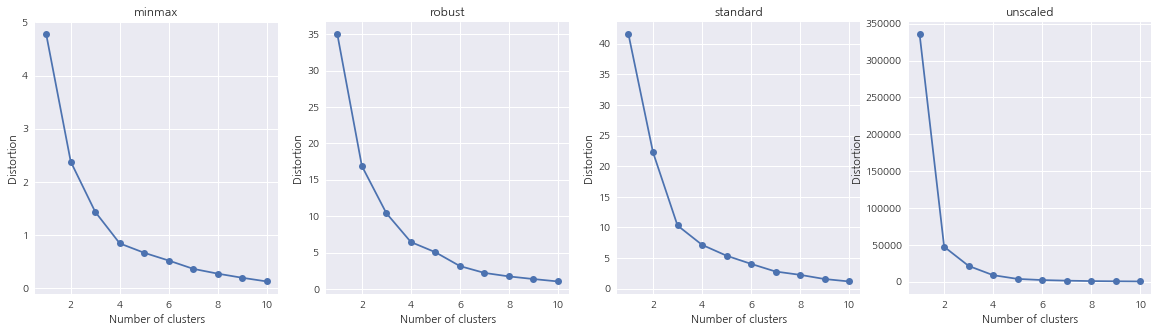

In [ ]:
cols = ['상권발달지수', '인구대비공시지가', '교통접근성']
cols_ = ['상권발달지수', '인구대비공시지가']
scaler = ['minmax', 'robust', 'standard', 'unscaled']
box = {}

for m in scaler:
    if m == 'unscaled':
        box[m] = df.loc[:,cols]
    else:
        box[m] = df_scaler(df, cols_, scale = m) # scaling 함수 적용


n = len(box)
fig, axes = plt.subplots(1,n,figsize = (5 * n, 5))
for i in range(len(scaler)):
    distortions = []
    for j in range(1, 11):
        km = KMeans(n_clusters=j)
        km.fit(box[scaler[i]].loc[:,cols])
        distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음
    
    axes[i].plot(range(1, 11), distortions, marker='o')
    axes[i].set_title(scaler[i])
    axes[i].set_xlabel('Number of clusters')
    axes[i].set_ylabel('Distortion')
plt.show()

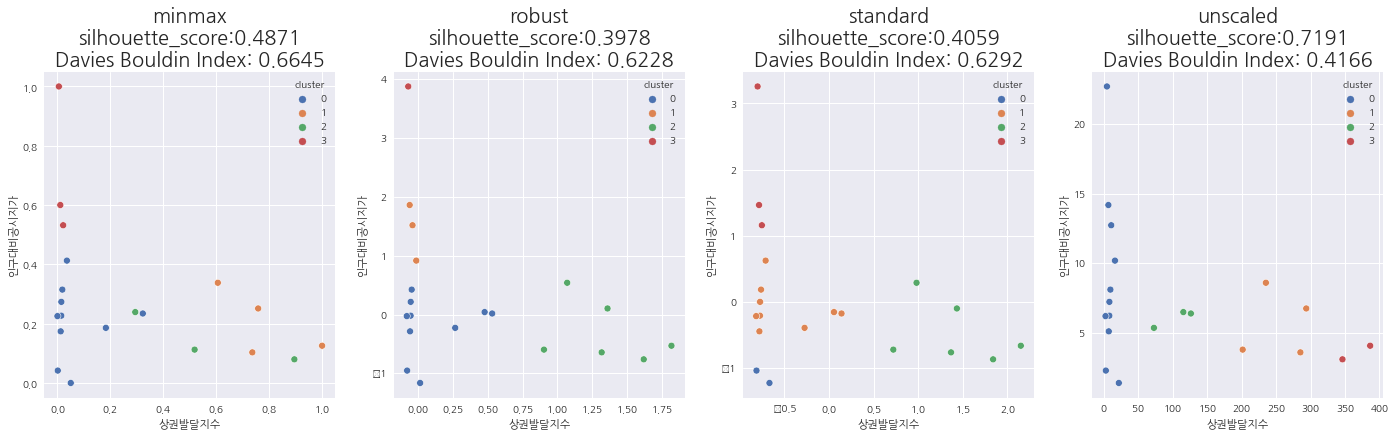

In [ ]:
n = len(box)
fig, axes = plt.subplots(1,n,figsize = (6 * n, 6))
for i in range(len(scaler)):
    
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(box[scaler[i]].loc[:,cols])
    box[scaler[i]]['cluster'] = kmeans.labels_
    
    s = sns.scatterplot(x = cols[0], y = cols[1], data = box[scaler[i]], marker='o', hue = 'cluster', palette = 'deep', ax = axes[i])
    s.set_title(f"{scaler[i]}\nsilhouette_score:{round(silhouette_score(box[scaler[i]].loc[:,cols], kmeans.labels_),4)}\nDavies Bouldin Index: {round(davies_bouldin_score(box[scaler[i]].loc[:,cols],kmeans.labels_),4)}", fontsize = 20)

    #s.set_xlabel(cols[0])
    #s.set_ylabel(cols[1])
plt.show()

# 실루엣 계수를 살펴보기 위해서 2차원으로 그림
# 3차원 plot은 아래에서 확인 가능

In [ ]:
# 최종 선택
cols = ['상권발달지수', '인구대비공시지가', '교통접근성']
data = df.copy()
data['상권발달지수'] = df_scaler(data, cols=['상권발달지수'], scale="minmax")['상권발달지수']
data['인구대비공시지가'] = df_scaler(data, cols=['인구대비공시지가'], scale="minmax")['인구대비공시지가']
dataset = data.copy()
dataset = dataset[cols]

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset)
y_pred =kmeans.labels_
model_data = dataset.copy()
model_data['교통접근성'] = data['교통접근성']
model_data["cluster"] = y_pred
model_data["행정동"] = data["행정동"]

In [ ]:
model_data
# 관심 군집(cluster 0): 교통접근성, 상권발달지수가 높고 인구대비공시지가가 낮은 읍면동
# 도담동, 새롬동, 조치원읍

,상권발달지수,인구대비공시지가,교통접근성,cluster,행정동
0,0.182975,0.185883,0.078397,1,고운동
1,0.014756,0.273572,0.266190,1,금남면
2,0.001296,0.041841,0.160460,1,다정동
3,0.322565,0.234334,0.003088,1,대평동
4,0.518301,0.112483,0.834255,0,도담동
5,1.000000,0.125641,0.272292,2,보람동
6,0.035752,0.412698,0.155430,1,부강면
7,0.895252,0.079764,0.820561,0,새롬동
8,0.050344,0.000000,0.192587,1,소담동
9,0.021605,0.531939,0.008528,3,소정면


Text(0.5, 0, '교통접근성')

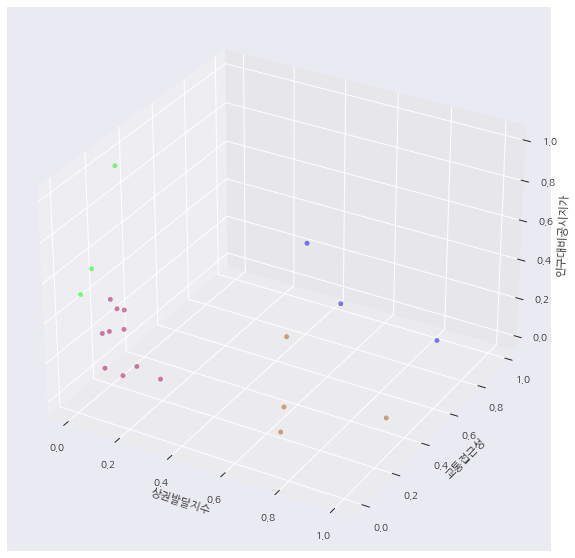

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = model_data['상권발달지수']
z = model_data['인구대비공시지가']
y = model_data['교통접근성']
ax.scatter(x, y, z, c = kmeans.labels_, s= 20, alpha=0.5, cmap='brg')

ax.set_xlabel('상권발달지수')
ax.set_zlabel('인구대비공시지가')
ax.set_ylabel('교통접근성')